In [1]:
import pandas as pd
import numpy as np
import umap
from pandas.plotting import scatter_matrix
import warnings, tqdm
warnings.simplefilter('ignore')

In [2]:
data=pd.read_csv('BMA_fulldata_transcriptome.txt',sep='\t',header=None)
data.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,NaN,NaN,NaN,outliers 1,New Value,New Value,New Value,New Value,New Value,New Value,New Value
1,NaN,NaN,NaN,NaN,NaN,slide,278,278,278,278,278,278,278
2,NaN,NaN,NaN,NaN,NaN,groups,CONT,CONT,CONT,BMA,BMA,BMA,BMA
3,NaN,NaN,NaN,NaN,NaN,labellling Cont,1,1,2,1,1,2,2
4,noname,Gene_Symbol,p-value,q-value,Fold change,Row annotation 1,BMAControl,BMAControl,BMAControl,BMA,BMA,BMA,BMA
5,EMBV3_37312,DENND2D,1.5674794800607915e-6,0.0688499686821902,1.750938361543412,NaN,1.03,0.96833,0.98996,1.7936,1.7658,1.7868,1.8707
6,EMBV3_04815,MRPL50,3.3726059619397325e-5,0.3389762891677945,1.5531261228633593,NaN,2.5299,2.4466,2.3561,3.0671,3.0499,3.0815,3.119
7,EMBV3_42381,LOC511424,3.411589301993548e-5,0.3389762891677945,2.1874245281778393,NaN,2.1384,2.033,2.3223,3.3403,3.2143,3.3568,3.2638
8,EMBV3_32069,KLHL26,3.9550220953660566e-5,0.3389762891677945,0.44083170406133526,NaN,1.4946,1.742,1.5847,0.32155,0.4552,0.36333,0.56152
9,EMBV3_38631,NaN,4.112706859053046e-5,0.3389762891677945,2.1035846430041967,NaN,1.7177,1.8286,1.9548,2.9838,2.8737,2.7879,2.9808


In [3]:
data.shape

(43812, 13)

In [4]:
probe_name=data.iloc[5:,0]
probe_name.head()

5    EMBV3_37312
6    EMBV3_04815
7    EMBV3_42381
8    EMBV3_32069
9    EMBV3_38631
Name: 0, dtype: object

In [5]:
probe_name=pd.DataFrame(probe_name)
probe_name=probe_name.T
probe_name.head()

,5,6,7,8,9,10,11,12,13,14,...,43802,43803,43804,43805,43806,43807,43808,43809,43810,43811
0,EMBV3_37312,EMBV3_04815,EMBV3_42381,EMBV3_32069,EMBV3_38631,EMBV3_43308,EMBV3_25515,EMBV3_06496,EMBV3_26420,EMBV3_36434,...,ETG05_66023,ETG07_105829,ETG08_142674,ETG09_205211,ETG09_35454,ETG09_48764,ETG10_13482,ETG10_195139,ETG10_234183,ETG10_236652


In [6]:
origin_value=data.iloc[5:,-7:]
origin_value.head()

,6,7,8,9,10,11,12
5,1.03,0.96833,0.98996,1.7936,1.7658,1.7868,1.8707
6,2.5299,2.4466,2.3561,3.0671,3.0499,3.0815,3.119
7,2.1384,2.033,2.3223,3.3403,3.2143,3.3568,3.2638
8,1.4946,1.742,1.5847,0.32155,0.4552,0.36333,0.56152
9,1.7177,1.8286,1.9548,2.9838,2.8737,2.7879,2.9808


In [7]:
origin_value=pd.DataFrame(origin_value)
origin_value=origin_value.T
origin_value.shape

(7, 43807)

In [8]:
trans_data=pd.concat([probe_name,origin_value],ignore_index=True)
trans_data.head()

,5,6,7,8,9,10,11,12,13,14,...,43802,43803,43804,43805,43806,43807,43808,43809,43810,43811
0,EMBV3_37312,EMBV3_04815,EMBV3_42381,EMBV3_32069,EMBV3_38631,EMBV3_43308,EMBV3_25515,EMBV3_06496,EMBV3_26420,EMBV3_36434,...,ETG05_66023,ETG07_105829,ETG08_142674,ETG09_205211,ETG09_35454,ETG09_48764,ETG10_13482,ETG10_195139,ETG10_234183,ETG10_236652
1,1.03,2.5299,2.1384,1.4946,1.7177,1.3635,-0.12593,1.1758,1.3733,-0.10315,...,-1.3224,-1.3353,-1.2596,-1.1327,-1.2112,-1.1855,-1.4324,-1.0062,-1.1576,-2.3538
2,0.96833,2.4466,2.033,1.742,1.8286,1.3964,0.0011349,0.77155,1.703,-0.16049,...,-1.5818,-1.4209,-1.2441,-1.1487,-1.2011,-1.2444,-1.6084,-1.0704,-1.1578,-1.1023
3,0.98996,2.3561,2.3223,1.5847,1.9548,1.4578,-0.28685,0.79513,1.5469,-0.17697,...,-1.2728,-1.1977,-1.1313,-1.0723,-1.033,-1.0633,-1.2339,-0.81037,-0.90353,-1.4876
4,1.7936,3.0671,3.3403,0.32155,2.9838,0.62552,-0.95475,-0.495,2.8048,0.12211,...,-1.5402,-1.2431,-1.3079,-0.97949,-1.1387,-1.3137,-1.5207,-1.1023,-1.1734,-0.99777


In [9]:
trans_data=trans_data.rename(columns=trans_data.iloc[0]).drop(trans_data.index[0])
trans_data.head(10)

,EMBV3_37312,EMBV3_04815,EMBV3_42381,EMBV3_32069,EMBV3_38631,EMBV3_43308,EMBV3_25515,EMBV3_06496,EMBV3_26420,EMBV3_36434,...,ETG05_66023,ETG07_105829,ETG08_142674,ETG09_205211,ETG09_35454,ETG09_48764,ETG10_13482,ETG10_195139,ETG10_234183,ETG10_236652
1,1.03,2.5299,2.1384,1.4946,1.7177,1.3635,-0.12593,1.1758,1.3733,-0.10315,...,-1.3224,-1.3353,-1.2596,-1.1327,-1.2112,-1.1855,-1.4324,-1.0062,-1.1576,-2.3538
2,0.96833,2.4466,2.033,1.742,1.8286,1.3964,0.0011349,0.77155,1.703,-0.16049,...,-1.5818,-1.4209,-1.2441,-1.1487,-1.2011,-1.2444,-1.6084,-1.0704,-1.1578,-1.1023
3,0.98996,2.3561,2.3223,1.5847,1.9548,1.4578,-0.28685,0.79513,1.5469,-0.17697,...,-1.2728,-1.1977,-1.1313,-1.0723,-1.033,-1.0633,-1.2339,-0.81037,-0.90353,-1.4876
4,1.7936,3.0671,3.3403,0.32155,2.9838,0.62552,-0.95475,-0.495,2.8048,0.12211,...,-1.5402,-1.2431,-1.3079,-0.97949,-1.1387,-1.3137,-1.5207,-1.1023,-1.1734,-0.99777
5,1.7658,3.0499,3.2143,0.4552,2.8737,0.61375,-1.0907,-0.66363,2.5615,0.20001,...,-1.1591,-1.2178,-1.4043,-1.0347,-1.1803,-1.3489,-1.4625,-0.9063,-0.97286,-1.0266
6,1.7868,3.0815,3.3568,0.36333,2.7879,0.40812,-1.0795,-0.5699,2.6949,0.17054,...,-1.2064,-1.0659,-1.1116,-1.112,-1.1293,-1.0413,-1.2376,-0.94946,-0.92218,-4.2929
7,1.8707,3.119,3.2638,0.56152,2.9808,0.47865,-1.0729,-0.3881,2.6029,0.13781,...,-1.1268,-1.1736,-1.213,-1.1167,-1.1331,-1.1023,-1.1162,-1.0163,-1.032,-1.1504


In [10]:
trans_genes=pd.read_csv('Trans genes for TDA.csv',header=None)
trans_genes=trans_genes.loc[1:].T.values.tolist()

In [11]:
trans_genes

[['EMBV3_36880',
  'EMBV3_12193',
  'EMBV3_32069',
  'EMBV3_12200',
  'EMBV3_07752',
  'EMBV3_01993',
  'EMBV3_04815',
  'EMBV3_35222',
  'EMBV3_11544',
  'EMBV3_39314',
  'EMBV3_14555',
  'EMBV3_15382',
  'EMBV3_32008',
  'EMBV3_35013',
  'EMBV3_04354',
  'EMBV3_35158',
  'EMBV3_14527',
  'EMBV3_23352',
  'EMBV3_29779',
  'EMBV3_30249',
  'EMBV3_43215',
  'EMBV3_07113',
  'EMBV3_02644',
  'EMBV3_11519',
  'EMBV3_18935',
  'EMBV3_43391',
  'EMBV3_17007',
  'EMBV3_33890',
  'EMBV3_38592',
  'EMBV3_08281',
  'EMBV3_33668',
  'EMBV3_40540',
  'EMBV3_39552',
  'EMBV3_01526',
  'EMBV3_01600',
  'EMBV3_17716',
  'EMBV3_13848',
  'EMBV3_31335',
  'EMBV3_32631',
  'EMBV3_18274',
  'EMBV3_23767',
  'EMBV3_20772',
  'EMBV3_34560',
  'EMBV3_33432',
  'EMBV3_03249',
  'EMBV3_13357',
  'EMBV3_12355',
  'EMBV3_11034',
  'EMBV3_22139',
  'EMBV3_20737',
  'EMBV3_16014',
  'EMBV3_38302',
  'EMBV3_04113',
  'EMBV3_25091',
  'EMBV3_12962',
  'EMBV3_25826',
  'EMBV3_33523',
  'EMBV3_31308',
  'EMBV3_29577

In [12]:
trans_list=[]

In [13]:
for i in trans_genes[0]:
    trans_list.append(i)
trans_list[:5]

['EMBV3_36880', 'EMBV3_12193', 'EMBV3_32069', 'EMBV3_12200', 'EMBV3_07752']

In [14]:
tr_data=trans_data[trans_list].astype(float)
tr_data.head()

,EMBV3_36880,EMBV3_12193,EMBV3_32069,EMBV3_12200,EMBV3_07752,EMBV3_01993,EMBV3_04815,EMBV3_35222,EMBV3_11544,EMBV3_39314,...,EMBV3_03231,EMBV3_20746,EMBV3_26710,EMBV3_36296,EMBV3_31754,EMBV3_33832,EMBV3_29960,EMBV3_34178,EMBV3_33527,EMBV3_11126
1,0.22438,0.75910,1.49460,2.9738,3.3195,2.8892,2.5299,-0.78113,1.23020,1.9483,...,1.37770,1.79620,2.06810,-0.68642,-0.33751,2.2393,1.00370,4.8093,-0.62897,0.24447
2,0.29154,0.88606,1.74200,3.0946,3.5618,2.8271,2.4466,-0.68104,2.25540,1.9286,...,2.44080,1.82720,2.19280,-0.93140,-0.42350,2.7136,0.42677,4.5341,-0.41825,0.57542
3,0.22232,0.84995,1.58470,2.3175,3.4732,2.6514,2.3561,-0.77203,1.42910,2.0365,...,1.77920,1.49670,2.00200,-0.72171,-0.27080,2.2200,0.74127,4.3089,-0.62264,0.53169
4,0.77980,0.19526,0.32155,1.0105,1.7760,1.1289,3.0671,-0.92788,0.49329,2.1772,...,1.38540,1.03390,0.81736,-0.58716,0.07934,3.1838,1.15100,3.1959,-0.80352,-0.25295
5,0.78856,0.30980,0.45520,0.2729,1.2046,0.5994,3.0499,-0.88833,0.37986,2.1813,...,0.97186,0.85033,0.55240,-0.65308,0.27518,2.7676,1.28920,3.0976,-0.69580,-0.18203


In [15]:
Meth_data=pd.read_csv('BMA_METH_Full data.txt',sep='\t',header=None)

In [16]:
Meth_data.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Outliers,New Value,New Value,New Value,New Value,New Value,New Value,New Value
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Slides,Slide 27 & 28,Slide 27 & 28,Slide 27 & 28,Slide 27 & 28,Slide 27 & 28,Slide 27 & 28,Slide 27 & 28
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Labelling,2,1,1,1,1,2,2
3,noname,Chromosome,CpG,CpG_Density,CpG_Distance,CpG_Length,Cpg_Island,Distal_Promoter,EMBV3_Probe,Exon,...,R-statistic,Correlation (%),Row annotation 1,BMAControl,BMAControl,BMAControl,BMA,BMA,BMA,BMA
4,EDMA_MET_19_06893,chr19,20,0,59,0,304,SHMT1 SLC5A10 PRPSAP2 TOP3A FLII LOC781661 SMC...,EMBV3_06474,NaN,...,0.9917567534446318,NaN,NaN,-1.3399,-1.4525,-1.4297,-0.76591,-0.80366,-0.84486,-0.81574


In [17]:
Meth_name=Meth_data.loc[4:,0]
Meth_name.head()

4    EDMA_MET_19_06893
5    EDMA_MET_13_05916
6    EDMA_MET_02_10253
7    EDMA_MET_18_00338
8    EDMA_MET_26_03405
Name: 0, dtype: object

In [18]:
Meth_name=pd.DataFrame(Meth_name)
Meth_name=Meth_name.T
Meth_name.head()

,4,5,6,7,8,9,10,11,12,13,...,417662,417663,417664,417665,417666,417667,417668,417669,417670,417671
0,EDMA_MET_19_06893,EDMA_MET_13_05916,EDMA_MET_02_10253,EDMA_MET_18_00338,EDMA_MET_26_03405,EDMA_MET_21_09960,EDMA_MET_26_09069,EDMA_MET_10_15252,EDMA_MET_18_08474,EDMA_MET_05_00227,...,SM_03,SM_04,SM_05,SM_06,SM_07,SM_08,SM_09,SM_10,SM_11,SM_12


In [19]:
meth_origin_value=Meth_data.iloc[4:,-7:].T
meth_origin_value.head()

,4,5,6,7,8,9,10,11,12,13,...,417662,417663,417664,417665,417666,417667,417668,417669,417670,417671
43,-1.3399,-1.5302,-1.2556,-1.4302,-0.52919,-0.61494,0.66892,0.11469,-1.2307,-1.5959,...,-0.98465,-1.2376,-2.1644,-1.7332,-1.1361,-1.4896,0.24657,-1.5848,-0.82205,-0.67191
44,-1.4525,-1.4971,-1.4987,-1.3283,-0.62,-0.61708,0.61079,0.11063,-1.3179,-1.369,...,-1.8676,-0.93399,-0.29061,-1.4853,-0.80617,-0.99019,-1.3092,-1.9527,-0.82179,-2.9776
45,-1.4297,-1.4279,-1.3518,-1.2865,-0.49837,-0.49181,0.74642,-0.098656,-1.2766,-1.4682,...,-1.523,-1.5404,-0.3026,-1.4189,-1.352,-1.622,-1.055,-2.2086,-1.3559,-0.96117
46,-0.76591,-0.99827,-0.50121,-0.89559,-0.17192,-1.3488,0.14632,-0.58908,-1.0075,-0.82726,...,-1.6549,-2.1641,-0.3205,-1.3153,-1.3489,-1.3789,-1.371,-1.7924,-1.6153,-1.5461
47,-0.80366,-0.96918,-0.31883,-0.86354,-0.19043,-1.3173,0.087175,-0.67801,-0.95373,-0.67036,...,-1.317,-0.97845,-1.2903,-0.60507,-0.88276,-1.1841,-1.0553,-0.97017,-1.9423,-0.99431


In [20]:
meth_origin_value.shape

(7, 417668)

In [21]:
me_data=pd.concat([Meth_name,meth_origin_value],ignore_index=True)
me_data.head()

,4,5,6,7,8,9,10,11,12,13,...,417662,417663,417664,417665,417666,417667,417668,417669,417670,417671
0,EDMA_MET_19_06893,EDMA_MET_13_05916,EDMA_MET_02_10253,EDMA_MET_18_00338,EDMA_MET_26_03405,EDMA_MET_21_09960,EDMA_MET_26_09069,EDMA_MET_10_15252,EDMA_MET_18_08474,EDMA_MET_05_00227,...,SM_03,SM_04,SM_05,SM_06,SM_07,SM_08,SM_09,SM_10,SM_11,SM_12
1,-1.3399,-1.5302,-1.2556,-1.4302,-0.52919,-0.61494,0.66892,0.11469,-1.2307,-1.5959,...,-0.98465,-1.2376,-2.1644,-1.7332,-1.1361,-1.4896,0.24657,-1.5848,-0.82205,-0.67191
2,-1.4525,-1.4971,-1.4987,-1.3283,-0.62,-0.61708,0.61079,0.11063,-1.3179,-1.369,...,-1.8676,-0.93399,-0.29061,-1.4853,-0.80617,-0.99019,-1.3092,-1.9527,-0.82179,-2.9776
3,-1.4297,-1.4279,-1.3518,-1.2865,-0.49837,-0.49181,0.74642,-0.098656,-1.2766,-1.4682,...,-1.523,-1.5404,-0.3026,-1.4189,-1.352,-1.622,-1.055,-2.2086,-1.3559,-0.96117
4,-0.76591,-0.99827,-0.50121,-0.89559,-0.17192,-1.3488,0.14632,-0.58908,-1.0075,-0.82726,...,-1.6549,-2.1641,-0.3205,-1.3153,-1.3489,-1.3789,-1.371,-1.7924,-1.6153,-1.5461


In [22]:
me_data=me_data.rename(columns=me_data.iloc[0]).drop(me_data.index[0])
me_data.head(10)

,EDMA_MET_19_06893,EDMA_MET_13_05916,EDMA_MET_02_10253,EDMA_MET_18_00338,EDMA_MET_26_03405,EDMA_MET_21_09960,EDMA_MET_26_09069,EDMA_MET_10_15252,EDMA_MET_18_08474,EDMA_MET_05_00227,...,SM_03,SM_04,SM_05,SM_06,SM_07,SM_08,SM_09,SM_10,SM_11,SM_12
1,-1.3399,-1.5302,-1.2556,-1.4302,-0.52919,-0.61494,0.66892,0.11469,-1.2307,-1.5959,...,-0.98465,-1.2376,-2.1644,-1.7332,-1.1361,-1.4896,0.24657,-1.5848,-0.82205,-0.67191
2,-1.4525,-1.4971,-1.4987,-1.3283,-0.62,-0.61708,0.61079,0.11063,-1.3179,-1.369,...,-1.8676,-0.93399,-0.29061,-1.4853,-0.80617,-0.99019,-1.3092,-1.9527,-0.82179,-2.9776
3,-1.4297,-1.4279,-1.3518,-1.2865,-0.49837,-0.49181,0.74642,-0.098656,-1.2766,-1.4682,...,-1.523,-1.5404,-0.3026,-1.4189,-1.352,-1.622,-1.055,-2.2086,-1.3559,-0.96117
4,-0.76591,-0.99827,-0.50121,-0.89559,-0.17192,-1.3488,0.14632,-0.58908,-1.0075,-0.82726,...,-1.6549,-2.1641,-0.3205,-1.3153,-1.3489,-1.3789,-1.371,-1.7924,-1.6153,-1.5461
5,-0.80366,-0.96918,-0.31883,-0.86354,-0.19043,-1.3173,0.087175,-0.67801,-0.95373,-0.67036,...,-1.317,-0.97845,-1.2903,-0.60507,-0.88276,-1.1841,-1.0553,-0.97017,-1.9423,-0.99431
6,-0.84486,-0.91698,-0.4791,-0.79394,-0.11863,-1.3398,-0.0067413,-0.59976,-0.9935,-0.61534,...,-1.2828,-1.5502,-3.3813,-1.4215,-1.1696,-0.98653,-0.78206,-2.5445,-0.8876,-1.2275
7,-0.81574,-1.0518,-0.50869,-0.7715,-0.10906,-1.1358,-0.045853,-0.7282,-0.92074,-0.59597,...,-1.9763,-2.0449,-0.30044,-1.2699,-0.47198,-0.96018,-0.60545,-1.9247,-1.4708,-1.9732


In [23]:
meth_genes=pd.read_csv('Meth Genes for TDA.csv',header=None)
meth_genes=meth_genes.loc[1:].T.values.tolist()
len(meth_genes[0])

370

In [24]:
meth_list=[]
for i in meth_genes[0]:
    meth_list.append(i)
meth_list[:5]

['EDMA_MET_26_03405',
 'EDMA_MET_16_06181',
 'EDMA_MET_10_10395',
 'SRN_1802360',
 'EDMA_MET_07_02034']

In [25]:
met_data=me_data[meth_list].astype(float)
met_data.head()

,EDMA_MET_26_03405,EDMA_MET_16_06181,EDMA_MET_10_10395,SRN_1802360,EDMA_MET_07_02034,EDMA_MET_18_09476,EDMA_MET_15_03484,EDMA_MET_23_02687,EDMA_MET_11_15998,EDMA_MET_27_02237,...,EDMA_MET_15_04691,EDMA_MET_14_09199,EDMA_MET_15_02370,EDMA_MET_01_07986,EDMA_MET_25_04538,EDMA_MET_12_08674,EDMA_MET_24_09933,EDMA_MET_17_06085,EDMA_MET_05_17881,EDMA_MET_11_13405
1,-0.52919,0.53583,0.43312,1.72890,0.968100,0.325660,0.250690,-1.17240,-0.83007,-0.057652,...,2.0276,0.13190,-0.45643,1.4262,-0.528960,-0.649250,-1.84030,2.1296,-2.170600,1.44940
2,-0.62000,0.87034,0.32588,1.38620,0.325940,-0.080517,-0.058957,-1.33630,-0.84244,0.575820,...,2.0435,0.96143,-0.94567,1.6022,0.051138,-0.030782,-1.27440,1.3414,-0.715890,0.90284
3,-0.49837,0.93097,0.46460,1.54090,0.393300,-0.015464,0.973030,-1.10460,-0.96375,0.165660,...,2.2923,0.94735,-1.21550,1.5781,0.348220,-0.755020,-1.51360,1.2544,-0.417490,1.06500
4,-0.17192,-0.29549,0.17017,0.92656,-0.049291,-0.891680,-0.415780,-0.75959,-1.13150,-0.404550,...,1.8298,1.19410,-1.16280,1.0280,0.385850,-1.220300,-0.35386,1.1257,0.030825,0.80717
5,-0.19043,0.16513,0.17255,1.10480,-0.110360,-0.851750,-0.697760,-0.72442,-1.56800,-0.209110,...,1.7277,1.19530,-1.55080,1.1367,0.615600,-0.950740,-0.64036,0.8892,-0.008643,0.58974


In [26]:
def generate_correlation_map(x, y):
    """Correlate each n with each m.

    Parameters
    ----------
    x : np.array
      Shape N X T.

    y : np.array
      Shape M X T.

    Returns
    -------
    np.array
      N X M array in which each element is a correlation coefficient.

    """
    mu_x = x.mean(1)
    mu_y = y.mean(1)
    n = x.shape[1]
    if n != y.shape[1]:
        raise ValueError('x and y must ' +
                         'have the same number of timepoints.')
    s_x = x.std(1, ddof=n - 1)
    s_y = y.std(1, ddof=n - 1)
    cov = np.dot(x,
                 y.T) - n * np.dot(mu_x[:, np.newaxis],
                                  mu_y[np.newaxis, :])
    return cov / np.dot(s_x[:, np.newaxis], s_y[np.newaxis, :])

In [27]:
cordata_ori=generate_correlation_map(tr_data.T,met_data.T)
cordata_ori

array([[ 0.96865005, -0.91695994, -0.89252013, ..., -0.82278192,
         0.83102439, -0.86131847],
       [-0.97641427,  0.90989864,  0.77361896, ...,  0.67341563,
        -0.71360867,  0.76185823],
       [-0.97440601,  0.93889751,  0.8594454 , ...,  0.70618699,
        -0.72532072,  0.6939681 ],
       ...,
       [-0.95807352,  0.81509602,  0.80219346, ...,  0.8409483 ,
        -0.85797331,  0.82067557],
       [-0.85578311,  0.74206969,  0.41587652, ...,  0.41389141,
        -0.49719442,  0.5268859 ],
       [-0.94760719,  0.87191436,  0.6829897 , ...,  0.59166338,
        -0.63117453,  0.76856597]])

In [28]:
cordata=generate_correlation_map(tr_data.T,met_data.T)
cordata

array([[ 0.96865005, -0.91695994, -0.89252013, ..., -0.82278192,
         0.83102439, -0.86131847],
       [-0.97641427,  0.90989864,  0.77361896, ...,  0.67341563,
        -0.71360867,  0.76185823],
       [-0.97440601,  0.93889751,  0.8594454 , ...,  0.70618699,
        -0.72532072,  0.6939681 ],
       ...,
       [-0.95807352,  0.81509602,  0.80219346, ...,  0.8409483 ,
        -0.85797331,  0.82067557],
       [-0.85578311,  0.74206969,  0.41587652, ...,  0.41389141,
        -0.49719442,  0.5268859 ],
       [-0.94760719,  0.87191436,  0.6829897 , ...,  0.59166338,
        -0.63117453,  0.76856597]])

In [29]:
cordata.shape

(319, 370)

In [30]:
cordata=cordata*0.5+0.5
cordata

array([[0.98432503, 0.04152003, 0.05373993, ..., 0.08860904, 0.9155122 ,
        0.06934077],
       [0.01179286, 0.95494932, 0.88680948, ..., 0.83670781, 0.14319566,
        0.88092911],
       [0.01279699, 0.96944875, 0.9297227 , ..., 0.85309349, 0.13733964,
        0.84698405],
       ...,
       [0.02096324, 0.90754801, 0.90109673, ..., 0.92047415, 0.07101334,
        0.91033779],
       [0.07210844, 0.87103484, 0.70793826, ..., 0.70694571, 0.25140279,
        0.76344295],
       [0.0261964 , 0.93595718, 0.84149485, ..., 0.79583169, 0.18441274,
        0.88428298]])

In [31]:
cordata.shape

(319, 370)

In [232]:
cordata_new=pd.DataFrame(cordata,columns=meth_list,index=trans_list)
cordata_new.head()

,EDMA_MET_26_03405,EDMA_MET_16_06181,EDMA_MET_10_10395,SRN_1802360,EDMA_MET_07_02034,EDMA_MET_18_09476,EDMA_MET_15_03484,EDMA_MET_23_02687,EDMA_MET_11_15998,EDMA_MET_27_02237,...,EDMA_MET_15_04691,EDMA_MET_14_09199,EDMA_MET_15_02370,EDMA_MET_01_07986,EDMA_MET_25_04538,EDMA_MET_12_08674,EDMA_MET_24_09933,EDMA_MET_17_06085,EDMA_MET_05_17881,EDMA_MET_11_13405
EMBV3_36880,0.984325,0.041520,0.053740,0.062071,0.070980,0.051656,0.077850,0.939062,0.069364,0.073463,...,0.080740,0.847579,0.177500,0.033994,0.901446,0.199364,0.895551,0.088609,0.915512,0.069341
EMBV3_12193,0.011793,0.954949,0.886809,0.943296,0.904579,0.942128,0.914605,0.092862,0.918798,0.939134,...,0.864363,0.174686,0.793887,0.983534,0.133209,0.894087,0.118536,0.836708,0.143196,0.880929
EMBV3_32069,0.012797,0.969449,0.929723,0.923898,0.881853,0.957450,0.888588,0.043386,0.909951,0.941992,...,0.841130,0.204564,0.800691,0.949384,0.168776,0.858359,0.078575,0.853093,0.137340,0.846984
EMBV3_12200,0.024270,0.884234,0.867170,0.923827,0.929765,0.958333,0.869726,0.082991,0.977280,0.890832,...,0.816963,0.132868,0.906831,0.929294,0.103744,0.878289,0.116016,0.893738,0.105714,0.888346
EMBV3_07752,0.012566,0.931265,0.902216,0.921874,0.920604,0.936946,0.925828,0.077514,0.968108,0.927478,...,0.898999,0.162657,0.838737,0.972725,0.098686,0.846845,0.139255,0.882092,0.117565,0.920531


In [233]:
cordata_new.to_csv('correlation matrix.csv',index=False,header=False)

In [33]:
cordata_value=cordata_new.values

In [34]:
import seaborn as sns

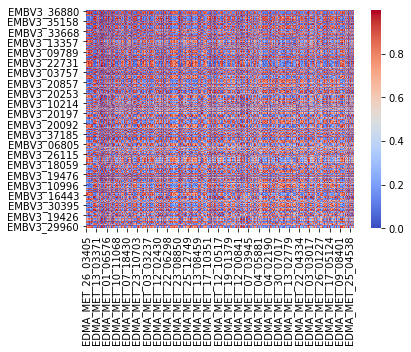

In [35]:
a=sns.heatmap(cordata_new,cmap='coolwarm')

In [36]:
#g=sns.clustermap(cordata_new,cmap="coolwarm",linewidths=.55, center=0,figsize=(200, 200))
#g.savefig('cluster.png')

In [37]:
cordata_binary=pd.DataFrame(cordata.copy())
cordata_binary.head()

,0,1,2,3,4,5,6,7,8,9,...,360,361,362,363,364,365,366,367,368,369
0,0.984325,0.041520,0.053740,0.062071,0.070980,0.051656,0.077850,0.939062,0.069364,0.073463,...,0.080740,0.847579,0.177500,0.033994,0.901446,0.199364,0.895551,0.088609,0.915512,0.069341
1,0.011793,0.954949,0.886809,0.943296,0.904579,0.942128,0.914605,0.092862,0.918798,0.939134,...,0.864363,0.174686,0.793887,0.983534,0.133209,0.894087,0.118536,0.836708,0.143196,0.880929
2,0.012797,0.969449,0.929723,0.923898,0.881853,0.957450,0.888588,0.043386,0.909951,0.941992,...,0.841130,0.204564,0.800691,0.949384,0.168776,0.858359,0.078575,0.853093,0.137340,0.846984
3,0.024270,0.884234,0.867170,0.923827,0.929765,0.958333,0.869726,0.082991,0.977280,0.890832,...,0.816963,0.132868,0.906831,0.929294,0.103744,0.878289,0.116016,0.893738,0.105714,0.888346
4,0.012566,0.931265,0.902216,0.921874,0.920604,0.936946,0.925828,0.077514,0.968108,0.927478,...,0.898999,0.162657,0.838737,0.972725,0.098686,0.846845,0.139255,0.882092,0.117565,0.920531


In [38]:
cordata_binary.shape

(319, 370)

In [39]:
cordata_binary.describe()

,0,1,2,3,4,5,6,7,8,9,...,360,361,362,363,364,365,366,367,368,369
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.501932,0.497221,0.495650,0.489616,0.494602,0.489737,0.496831,0.500591,0.501193,0.502831,...,0.508514,0.507139,0.494799,0.500102,0.497873,0.495558,0.513731,0.498239,0.503294,0.502361
std,0.434468,0.382009,0.351725,0.395093,0.387439,0.406652,0.357751,0.377968,0.404600,0.378238,...,0.327122,0.330836,0.328501,0.412580,0.360948,0.343926,0.349409,0.350379,0.358879,0.364457
min,0.008799,0.021777,0.017875,0.013594,0.015724,0.004601,0.024292,0.007848,0.015151,0.018128,...,0.047073,0.021548,0.022367,0.008879,0.013507,0.009967,0.020060,0.017127,0.014829,0.021562
25%,0.058109,0.118792,0.155203,0.097490,0.108693,0.086359,0.144090,0.116776,0.101200,0.135352,...,0.190604,0.174335,0.170779,0.090733,0.133369,0.145935,0.162747,0.152925,0.144239,0.141580
50%,0.839868,0.248082,0.299769,0.251169,0.290808,0.217384,0.327524,0.734403,0.251737,0.275397,...,0.348975,0.609632,0.352035,0.218925,0.648087,0.339848,0.696000,0.341319,0.674011,0.333177
75%,0.924719,0.884215,0.844415,0.892494,0.882150,0.901516,0.852312,0.864803,0.913194,0.883011,...,0.836860,0.832634,0.822878,0.918974,0.848598,0.847185,0.859882,0.847937,0.859665,0.868842
max,0.996193,0.971190,0.989070,0.987911,0.995164,0.990222,0.989071,0.981328,0.990486,0.984024,...,0.982180,0.982582,0.960829,0.995508,0.982609,0.985610,0.983384,0.988205,0.984861,0.980575


In [40]:
cordata_binary[cordata_binary>0.925]=1
cordata_binary[cordata_binary<=0.925]=0
cordata_binary.astype(int).head()

,0,1,2,3,4,5,6,7,8,9,...,360,361,362,363,364,365,366,367,368,369
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,1,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,1,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0


In [41]:
transposed_data=cordata_binary.T
transposed_data.head().astype(int)

,0,1,2,3,4,5,6,7,8,9,...,309,310,311,312,313,314,315,316,317,318
0,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [42]:
combined_matrix=np.dot(cordata_binary,transposed_data)
combined_matrix=pd.DataFrame(combined_matrix,columns=trans_list,index=trans_list,dtype=int)
combined_matrix.head()
combined_matrix.to_csv('Ajacency_matrix.csv')

In [43]:
trans_cluster=sns.clustermap(combined_matrix,cmap="YlOrRd",linewidths=.55, center=0,figsize=(200, 200))
#trans_cluster.savefig('trans_cluster.png')

In [44]:
#scatter_matrix(combined_matrix,figsize=(20,20),alpha=0.3)

In [45]:
trans_name_list_ids=trans_cluster.dendrogram_row.reordered_ind

In [46]:
trans_name_list=[]
for i in trans_name_list_ids:
    trans_name_list.append(trans_list[i])
trans_name_list[:5]

['EMBV3_30293', 'EMBV3_26574', 'EMBV3_33890', 'EMBV3_14778', 'EMBV3_36312']

In [47]:
pred_data=combined_matrix.values

In [170]:
pred_data

array([[56,  0,  0, ...,  0,  0,  0],
       [ 0, 35, 21, ..., 14, 11, 26],
       [ 0, 21, 31, ..., 15,  7, 13],
       ...,
       [ 0, 14, 15, ..., 42,  5,  8],
       [ 0, 11,  7, ...,  5, 21, 13],
       [ 0, 26, 13, ...,  8, 13, 34]])

In [179]:
max_pred_data=np.amax(pred_data,axis=1)
max_pred_data

array([56, 35, 31, 33, 39, 39, 25, 32, 28, 85, 36, 29, 78, 40, 43, 37, 40,
       57, 30, 53, 39, 55, 25, 29, 65, 27, 53, 57, 30, 13, 32, 23, 53, 27,
       23, 53, 37, 39, 19, 42, 33, 38, 14, 25, 19, 43, 13, 39, 34, 41, 34,
       23, 18, 31, 24, 25, 34, 28, 10, 32, 36, 39, 37, 12, 55, 34, 35,  7,
       64, 31, 38, 28, 64, 19, 28, 53, 22, 30, 35, 25, 43, 31, 36, 30, 16,
       22, 21, 44, 35, 29, 17, 37, 38, 44, 44, 24, 16, 18, 30, 35, 31, 25,
       11, 19, 20, 11, 16, 27, 22, 52, 11, 13,  9, 29, 28, 16, 31, 43, 58,
       34, 10, 70, 35,  6, 37, 21, 31, 38, 27, 28, 79, 44, 20, 34, 33, 39,
       19, 32, 14, 28, 21, 37, 57, 20,  6, 19,  9, 22, 43, 49, 13, 12, 29,
       22, 30, 34, 25, 11, 25, 15, 23, 26, 31, 19, 32, 22, 48, 28, 34, 21,
       39, 35, 12, 20, 27, 34, 46, 36, 25, 30, 23, 38, 45, 74, 22, 39, 31,
       44, 25, 44, 40, 16, 35, 19, 13, 26, 18, 17, 34, 27, 14,  6, 20, 14,
       10, 29, 11, 19, 11, 39, 28, 11, 30, 24, 14, 32, 18, 15, 33, 25, 12,
       32, 30, 11, 49, 38

In [247]:
mapping=dict(zip(trans_name_list,max_pred_data))
mapping

{'EMBV3_30293': 56,
 'EMBV3_26574': 35,
 'EMBV3_33890': 31,
 'EMBV3_14778': 33,
 'EMBV3_36312': 39,
 'EMBV3_31450': 39,
 'EMBV3_27982': 25,
 'EMBV3_35167': 32,
 'EMBV3_39520': 28,
 'EMBV3_22132': 85,
 'EMBV3_13723': 36,
 'EMBV3_32008': 29,
 'EMBV3_38340': 78,
 'EMBV3_23352': 40,
 'EMBV3_15000': 43,
 'EMBV3_38154': 37,
 'EMBV3_34041': 40,
 'EMBV3_26710': 57,
 'EMBV3_25091': 30,
 'EMBV3_36658': 53,
 'EMBV3_06805': 39,
 'EMBV3_10667': 55,
 'EMBV3_20144': 25,
 'EMBV3_17764': 29,
 'EMBV3_07816': 65,
 'EMBV3_39217': 27,
 'EMBV3_30932': 53,
 'EMBV3_03766': 57,
 'EMBV3_12509': 30,
 'EMBV3_26778': 13,
 'EMBV3_20495': 32,
 'EMBV3_01502': 23,
 'EMBV3_22640': 53,
 'EMBV3_42845': 27,
 'EMBV3_03741': 23,
 'EMBV3_01963': 53,
 'EMBV3_34629': 37,
 'EMBV3_04866': 39,
 'EMBV3_03137': 19,
 'EMBV3_16929': 42,
 'EMBV3_33527': 33,
 'EMBV3_15267': 38,
 'EMBV3_10996': 14,
 'EMBV3_42458': 25,
 'EMBV3_37185': 19,
 'EMBV3_10480': 43,
 'EMBV3_29285': 13,
 'EMBV3_10091': 39,
 'EMBV3_31515': 34,
 'EMBV3_27184': 41,


In [254]:
L=sorted(mapping.items(),key=lambda mapping:mapping[1],reverse=True)
L

[('EMBV3_22132', 85),
 ('EMBV3_29901', 79),
 ('EMBV3_38340', 78),
 ('EMBV3_20857', 74),
 ('EMBV3_31308', 72),
 ('EMBV3_40194', 70),
 ('EMBV3_07816', 65),
 ('EMBV3_11034', 64),
 ('EMBV3_00730', 64),
 ('EMBV3_12238', 58),
 ('EMBV3_26710', 57),
 ('EMBV3_03766', 57),
 ('EMBV3_33952', 57),
 ('EMBV3_03757', 57),
 ('EMBV3_30293', 56),
 ('EMBV3_19554', 56),
 ('EMBV3_10667', 55),
 ('EMBV3_14555', 55),
 ('EMBV3_27041', 55),
 ('EMBV3_36658', 53),
 ('EMBV3_30932', 53),
 ('EMBV3_22640', 53),
 ('EMBV3_01963', 53),
 ('EMBV3_11449', 53),
 ('EMBV3_29621', 52),
 ('EMBV3_15661', 52),
 ('EMBV3_35342', 50),
 ('EMBV3_34178', 49),
 ('EMBV3_26914', 49),
 ('EMBV3_01808', 49),
 ('EMBV3_28192', 48),
 ('EMBV3_23730', 47),
 ('EMBV3_32746', 46),
 ('EMBV3_18935', 46),
 ('EMBV3_39758', 45),
 ('EMBV3_35013', 45),
 ('EMBV3_17007', 45),
 ('EMBV3_43023', 44),
 ('EMBV3_18059', 44),
 ('EMBV3_12232', 44),
 ('EMBV3_14527', 44),
 ('EMBV3_03705', 44),
 ('EMBV3_29666', 44),
 ('EMBV3_40785', 44),
 ('EMBV3_15000', 43),
 ('EMBV3_1

In [173]:
pred_new=pred_data.flatten()

In [198]:
pred_new

array([56,  0,  0, ...,  8, 13, 34])

In [200]:
len(pred_new)

101761

In [203]:
x_max_pred_data=[x for x in range(1,320)]

In [219]:
import matplotlib.ticker as ticker

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <a list of 10 Text yticklabel objects>)

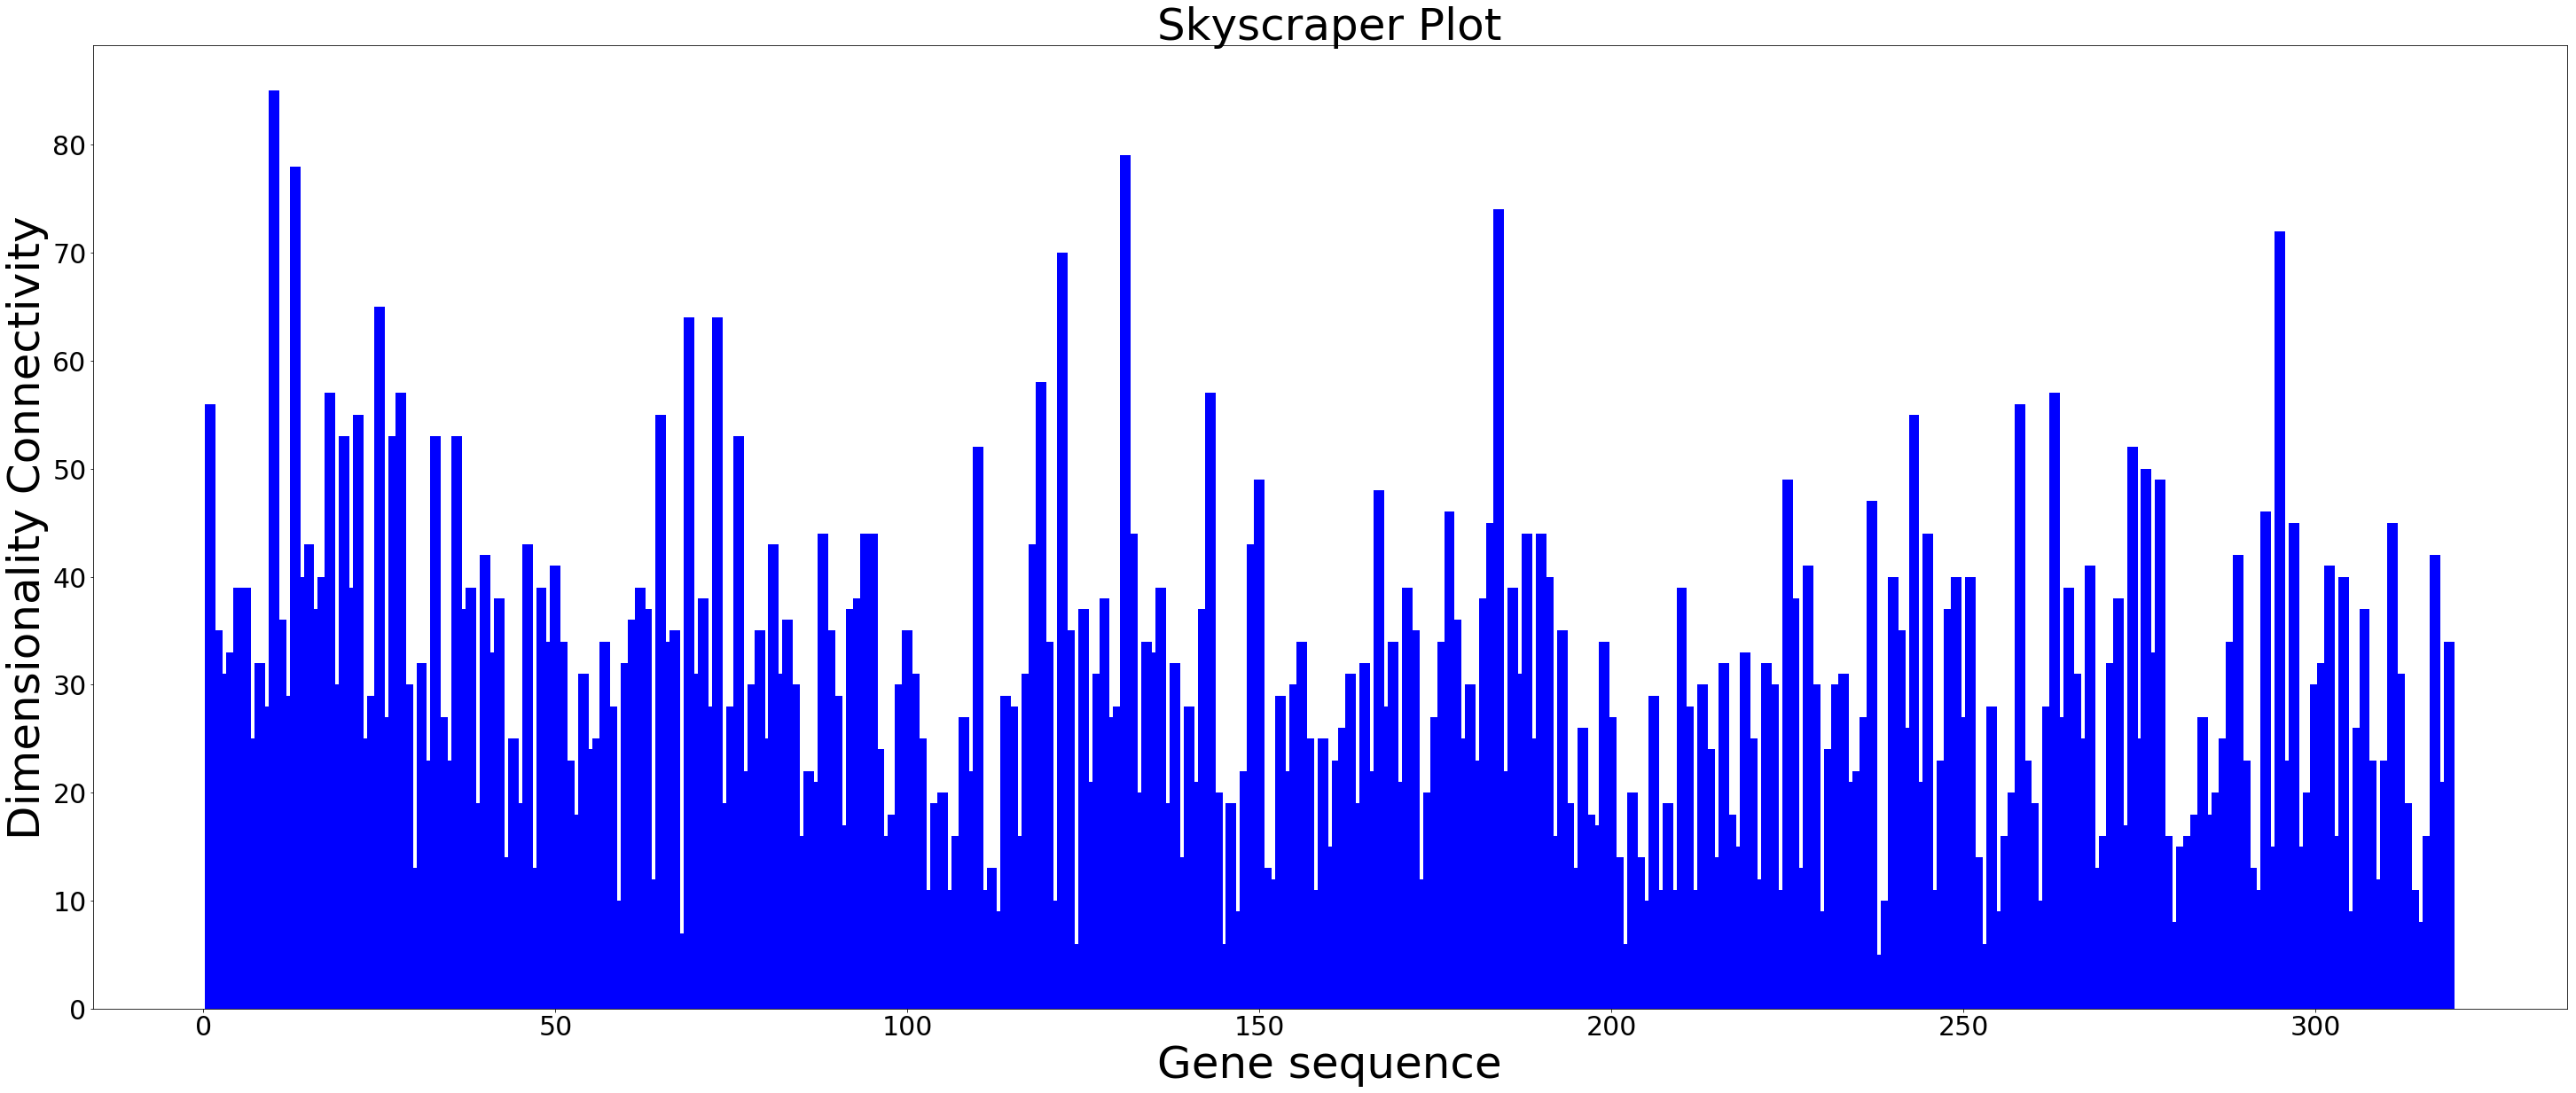

In [228]:
fig, ax = plt.subplots(figsize=(50,20))
plt.bar(x_max_pred_data,max_pred_data, width=1.5, color='b')

plt.title("Skyscraper Plot",fontsize=50)
plt.ylabel("Dimensionality Connectivity",fontsize=50)
plt.xlabel("Gene sequence",fontsize=50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
#ax.set_xticks([d  for d in x_max_pred_data])
#ax.set_xticklabels(x_max_pred_data,fontsize=10)

#for tick in ax.get_xticklabels():
#    tick.set_rotation(90)

Text(0.5, 1.0, 'bar chart')

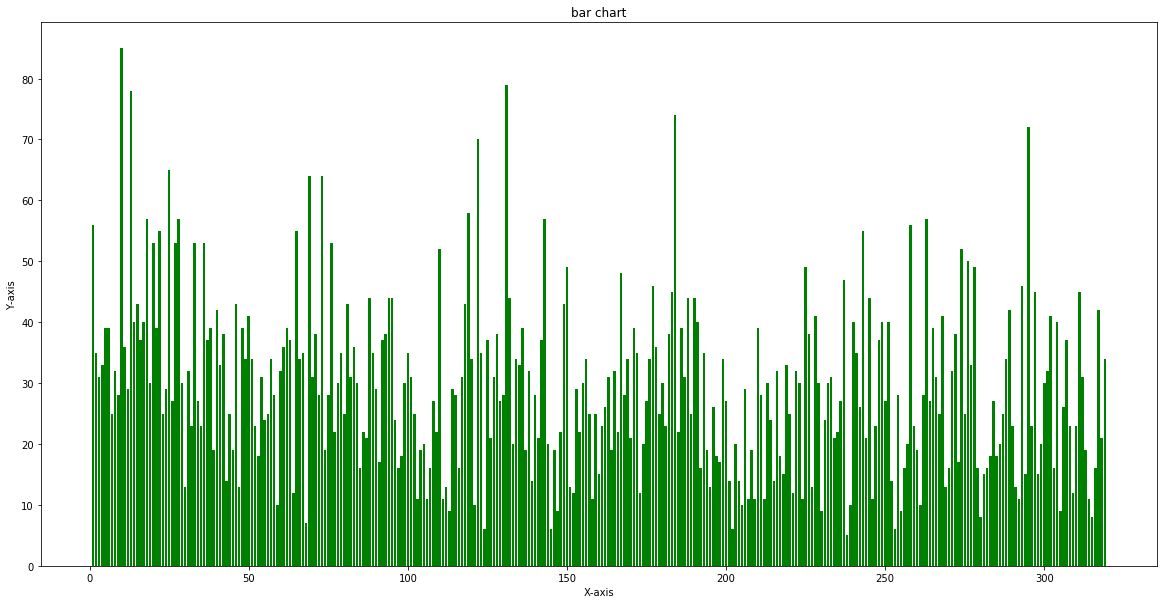

In [208]:
fig = plt.figure(figsize=(20,10))
plt.bar(x_max_pred_data,max_pred_data,color="green")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("bar chart")

(array([ 1.,  4.,  1.,  2.,  5.,  5., 11.,  5.,  8.,  6.,  5., 11.,  3.,
         6., 11.,  8.,  0.,  7.,  8., 11.,  4., 14.,  4., 10., 11.,  6.,
        12., 12.,  9.,  5., 12.,  9.,  4.,  0.,  8.,  7., 11.,  7.,  4.,
         3.,  5.,  7.,  3.,  2.,  1.,  1.,  3.,  1.,  0.,  2.,  0.,  5.,
         0.,  3.,  2.,  4.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 5.        ,  5.94117647,  6.88235294,  7.82352941,  8.76470588,
         9.70588235, 10.64705882, 11.58823529, 12.52941176, 13.47058824,
        14.41176471, 15.35294118, 16.29411765, 17.23529412, 18.17647059,
        19.11764706, 20.05882353, 21.        , 21.94117647, 22.88235294,
        23.82352941, 24.76470588, 25.70588235, 26.64705882, 27.58823529,
        28.52941176, 29.47058824, 30.41176471, 31.35294118, 32.29411765,
        33.23529412, 34.17647059, 35.11764706, 36.05882353, 37.        ,
      

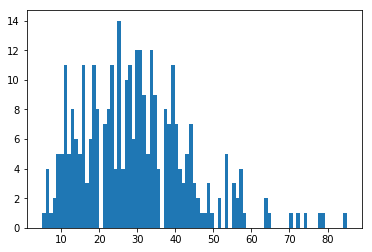

In [242]:
plt.hist(max_pred_data,bins=85)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 9 Text yticklabel objects>)

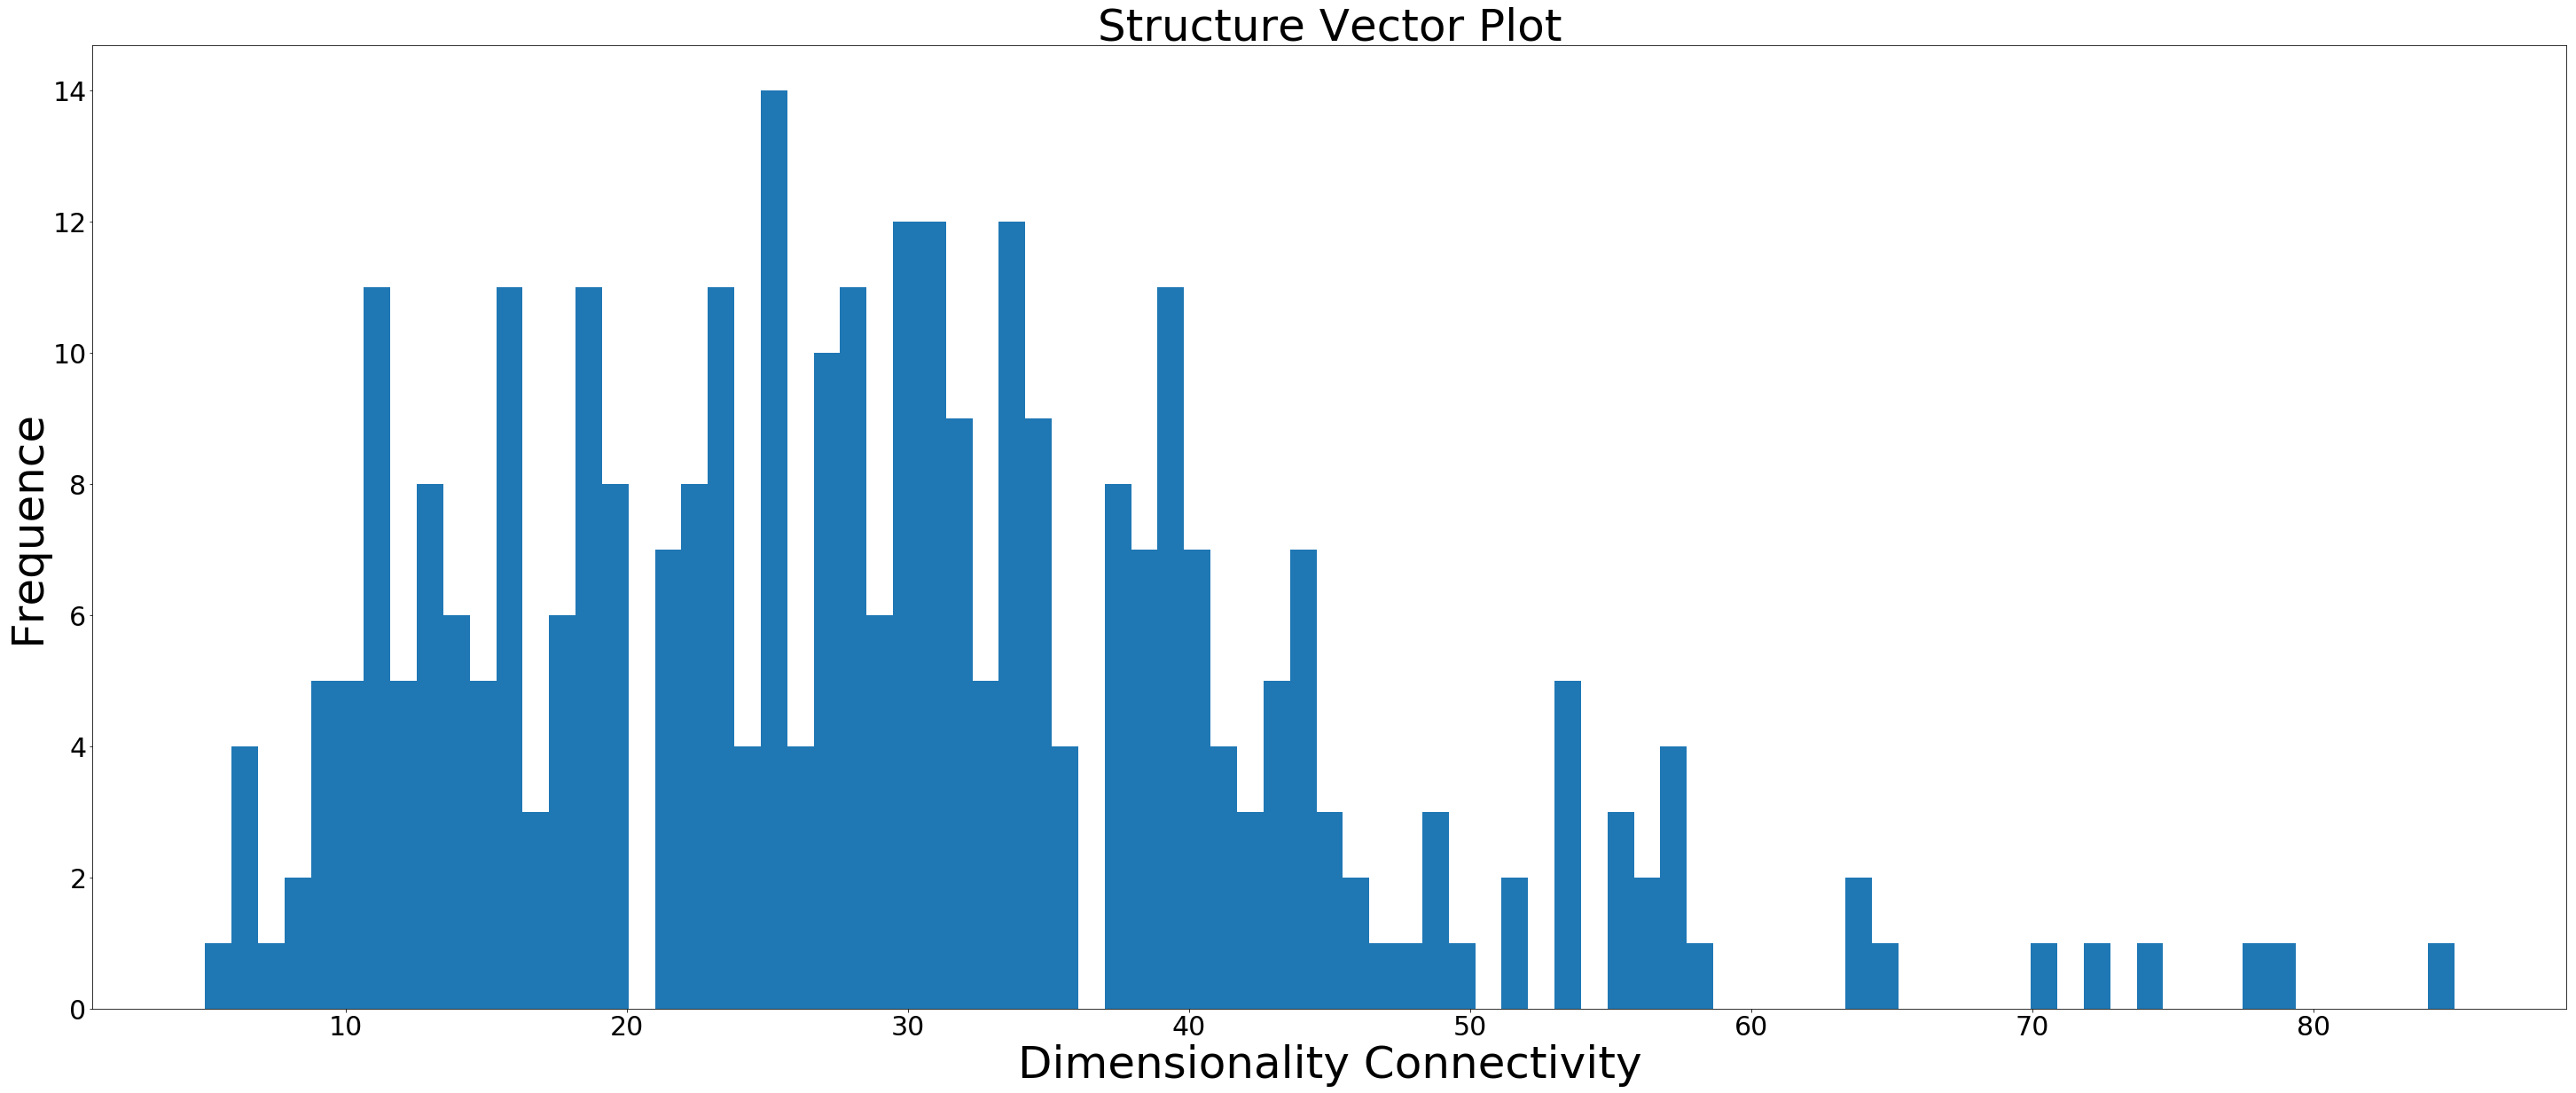

In [241]:
fig, ax = plt.subplots(figsize=(50,20))
plt.hist(max_pred_data,bins=85)
plt.title("Structure Vector Plot",fontsize=50)
plt.ylabel("Frequence",fontsize=50)
plt.xlabel("Dimensionality Connectivity",fontsize=50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as shc

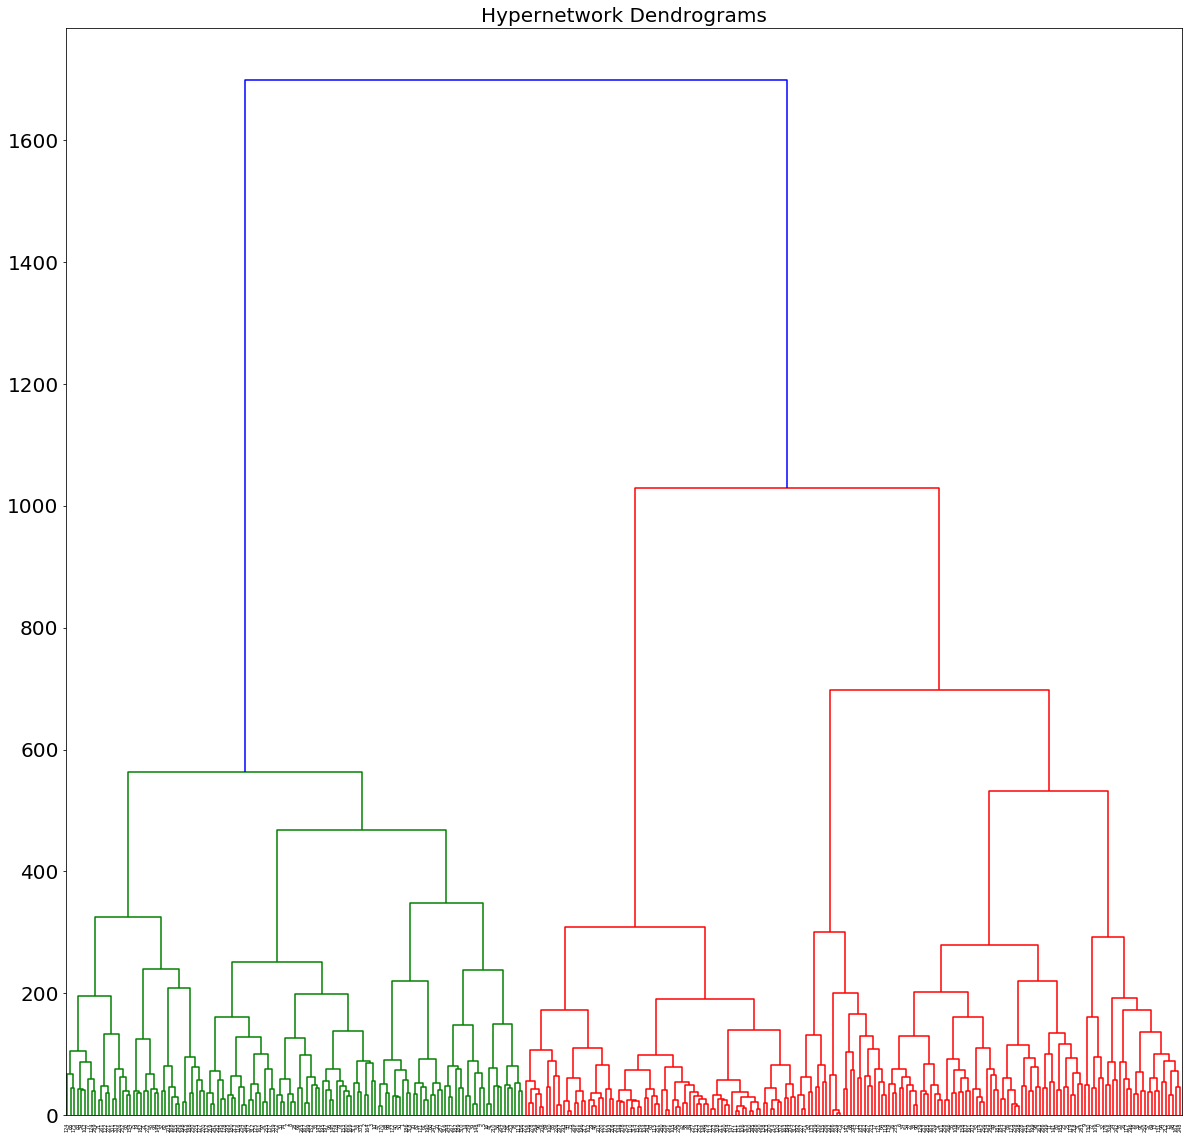

In [50]:
plt.figure(figsize=(20, 20))  
plt.title("Hypernetwork Dendrograms",fontsize=20)  
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
dend = shc.dendrogram(shc.linkage(pred_data, method='ward'))
plt.savefig('hcluser.png')

In [51]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
pre_label=cluster.fit_predict(pred_data)

In [52]:
pre_label

array([4, 0, 6, 6, 0, 0, 5, 6, 6, 4, 6, 5, 3, 4, 0, 4, 0, 3, 4, 1, 0, 1,
       5, 5, 4, 5, 4, 3, 6, 2, 6, 5, 4, 6, 5, 4, 4, 1, 5, 0, 0, 0, 2, 5,
       2, 1, 2, 0, 4, 5, 0, 5, 5, 6, 5, 5, 0, 4, 2, 1, 0, 0, 1, 2, 3, 1,
       6, 2, 3, 4, 0, 1, 4, 2, 6, 1, 5, 1, 0, 6, 5, 0, 0, 1, 2, 2, 5, 3,
       0, 2, 5, 4, 1, 1, 4, 6, 2, 6, 5, 0, 2, 5, 2, 5, 2, 2, 2, 1, 5, 4,
       2, 2, 2, 0, 5, 2, 6, 4, 3, 5, 2, 3, 1, 2, 1, 6, 0, 1, 6, 5, 4, 4,
       6, 3, 5, 3, 2, 6, 2, 5, 6, 5, 3, 6, 2, 6, 2, 2, 0, 1, 2, 2, 6, 6,
       1, 1, 0, 2, 5, 2, 6, 6, 4, 2, 6, 5, 3, 6, 1, 6, 0, 0, 2, 5, 1, 1,
       4, 0, 6, 5, 6, 5, 1, 3, 5, 5, 0, 0, 1, 0, 0, 5, 3, 2, 2, 6, 2, 6,
       1, 5, 2, 2, 5, 2, 2, 1, 2, 5, 2, 3, 0, 2, 4, 6, 2, 1, 2, 2, 5, 6,
       2, 1, 6, 2, 3, 1, 2, 3, 5, 2, 1, 5, 1, 5, 6, 5, 3, 2, 2, 0, 1, 6,
       4, 2, 0, 2, 6, 0, 4, 6, 4, 2, 2, 0, 2, 6, 5, 3, 5, 5, 2, 1, 3, 5,
       0, 6, 5, 0, 2, 2, 1, 3, 2, 3, 5, 3, 1, 1, 2, 2, 2, 2, 6, 5, 2, 5,
       5, 0, 5, 1, 2, 2, 3, 2, 3, 6, 4, 2, 5, 5, 3,

In [53]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [54]:
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    print(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection / union)

In [55]:
def getNewDic(trans_name_list,y_pred):
    new_dic=dict(zip(trans_name_list,y_pred))
    sorted(new_dic.items(),key=lambda item:item[1])
    return new_dic

In [56]:
def getClass(new_dic,i):
    classdic={}
    for item in new_dic.items():
        if item[1]==i:
            classdic[item[0]]=item[1]
    return list(classdic.keys())

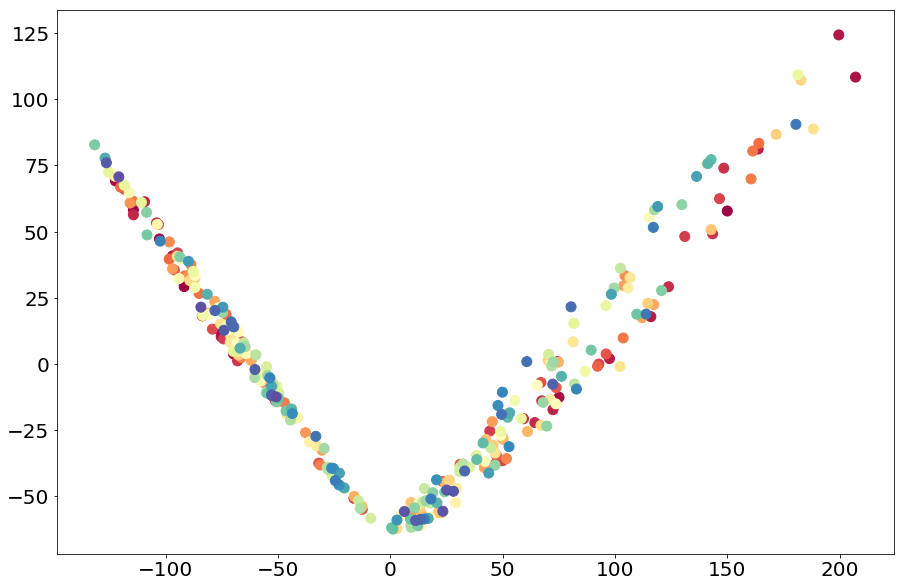

In [184]:

pca_embedding=PCA(n_components=2).fit_transform(pred_data)
# Fitting Model
x = np.linspace(1,10,319)
plt.figure(figsize=(15,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1],c=x, cmap='Spectral',s=100)

In [285]:
pca=PCA(n_components=3).fit(pred_data)

In [187]:
pca.explained_variance_ratio_

array([0.53418669, 0.14471453, 0.07903058, 0.05652241])

In [289]:
pca_embedding_3=PCA(n_components=3).fit_transform(pred_data)
#pca_embedding_3

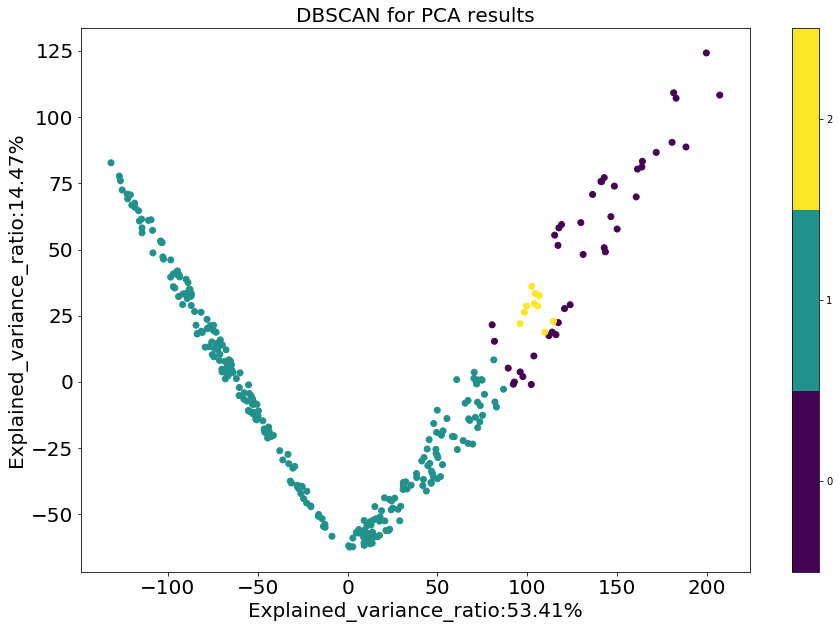

In [189]:
y_pred_pca = DBSCAN(eps = 12,min_samples=10).fit_predict(pca_embedding)
plt.figure(figsize=(15,10))
plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1], c=y_pred_pca+1)
cbar = plt.colorbar(boundaries=np.arange(4)-0.5)
labels=[0,1,2,3]
cbar.set_ticks(np.arange(3))
cbar.set_ticklabels(labels)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Explained_variance_ratio:53.41%',fontsize=20)
plt.ylabel('Explained_variance_ratio:14.47%',fontsize=20)
plt.title("DBSCAN for PCA results",fontsize=20)
plt.show()

In [59]:
y_pred_pca+=1
y_pred_pca

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,

In [60]:
new_dic_pca=getNewDic(trans_name_list,y_pred_pca)
#print(new_dic_tsne)
dic_pca_class0=getClass(new_dic_pca,0)
dic_pca_class1=getClass(new_dic_pca,1)
dic_pca_class2=getClass(new_dic_pca,2)
#dic_tsne_class3=getClass(new_dic_pca,3)

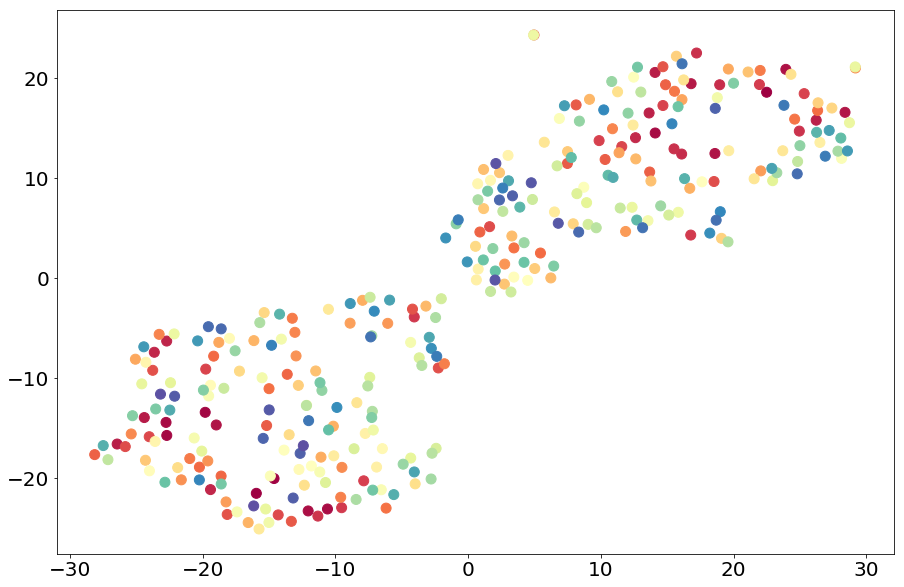

In [61]:
rng = np.random.RandomState(0)
# Defining Model
model = TSNE(random_state=42)

# Fitting Model
transformed = model.fit_transform(pred_data)

# Plotting 2d t-Sne
plt.figure(figsize=(15,10))
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
x = np.linspace(1,10,319)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(x_axis, y_axis, c=x,cmap='Spectral',s=100)
plt.show()

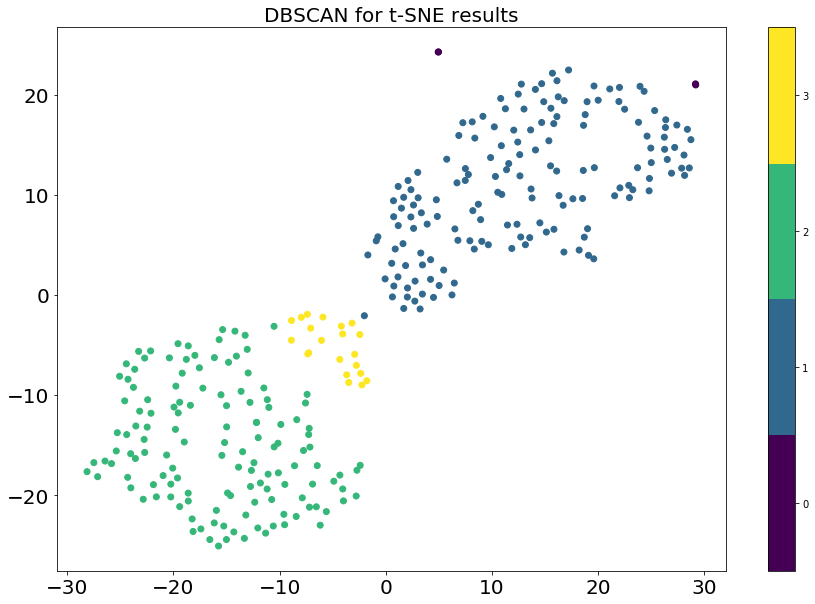

In [62]:
y_pred_tsne = DBSCAN(eps = 4,min_samples=10).fit_predict(transformed)
plt.figure(figsize=(15,10))
plt.scatter(x_axis, y_axis, c=y_pred_tsne+1)
cbar = plt.colorbar(boundaries=np.arange(5)-0.5)
labels=[0,1,2,3]
cbar.set_ticks(np.arange(4))
cbar.set_ticklabels(labels)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("DBSCAN for t-SNE results",fontsize=20)
plt.show()

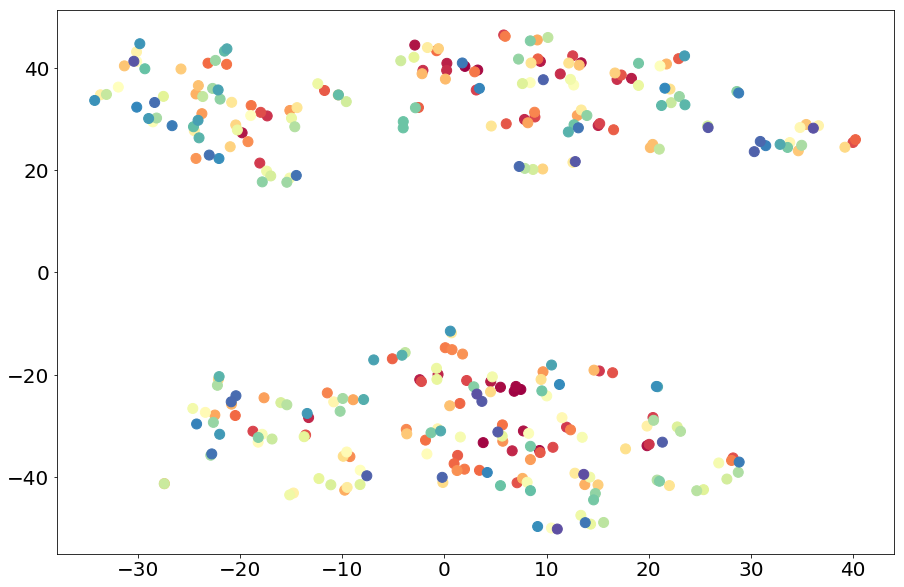

In [63]:
rng = np.random.RandomState(0)
# Defining Model
model_jac = TSNE(random_state=42,metric='jaccard',perplexity=10)

# Fitting Model
transformed_jac = model_jac.fit_transform(pred_data)

# Plotting 2d t-Sne
plt.figure(figsize=(15,10))
x_axis = transformed_jac[:, 0]
y_axis = transformed_jac[:, 1]
x = np.linspace(1,10,319)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.scatter(x_axis, y_axis, c=x,cmap='Spectral',s=100)
plt.show()

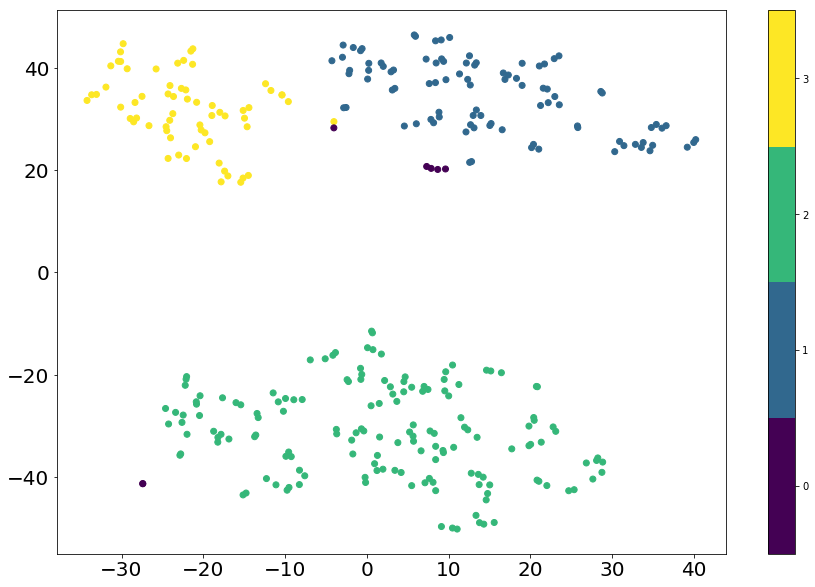

In [64]:
y_pred_tsne = DBSCAN(eps = 7,min_samples=10).fit_predict(transformed_jac)
plt.figure(figsize=(15,10))
plt.scatter(x_axis, y_axis, c=y_pred_tsne+1)
cbar = plt.colorbar(boundaries=np.arange(5)-0.5)
labels=[0,1,2,3]
cbar.set_ticks(np.arange(4))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cbar.set_ticklabels(labels)
plt.show()

In [65]:
y_pred_tsne+=1
y_pred_tsne

array([1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 3, 2, 2, 2, 3, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 3,
       2, 2, 2, 2, 1, 1, 2, 1, 3, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 3, 1, 2,
       2, 3, 3, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3,
       2, 2, 1, 1, 2, 2, 1, 2, 0, 2, 3, 2, 2, 1, 2, 1, 1, 1, 1, 2, 3, 1,
       3, 1, 1, 2, 3, 3, 2, 1, 1, 3, 0, 3, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 3, 1, 3, 2, 2, 1, 1, 2, 1, 3, 2, 3, 2, 3, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 3, 3, 3, 2, 2, 1, 1, 2, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       1, 2, 2, 3, 2, 3, 2, 3, 1, 3, 2, 2, 2, 2, 2, 1, 3, 2, 1, 2, 2, 2,
       2, 3, 0, 2, 3, 1, 1, 2, 0, 1, 3, 3, 2, 1, 1, 2, 0, 2, 2, 2, 3, 2,
       2, 2, 2, 1, 3, 2, 2, 3, 3, 3, 2, 1, 2, 1, 2, 1, 3, 3, 1, 2, 2, 2,
       1, 1, 2, 1, 2, 2, 1, 2, 1, 3, 0, 2, 3, 2, 3, 3, 3, 1, 1, 2, 3, 1,
       2, 2, 3, 2, 1, 2, 2, 3, 2, 3, 1, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 1,
       3, 2, 1, 2, 1, 1, 3, 2, 1, 2, 1, 2, 3, 3, 3,

In [66]:
new_dic_tsne=getNewDic(trans_name_list,y_pred_tsne)
#print(new_dic_tsne)
dic_tsne_class0=getClass(new_dic_tsne,0)
dic_tsne_class1=getClass(new_dic_tsne,1)
dic_tsne_class2=getClass(new_dic_tsne,2)
dic_tsne_class3=getClass(new_dic_tsne,3)

# Using Umap on cordata_value

H:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype float32 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


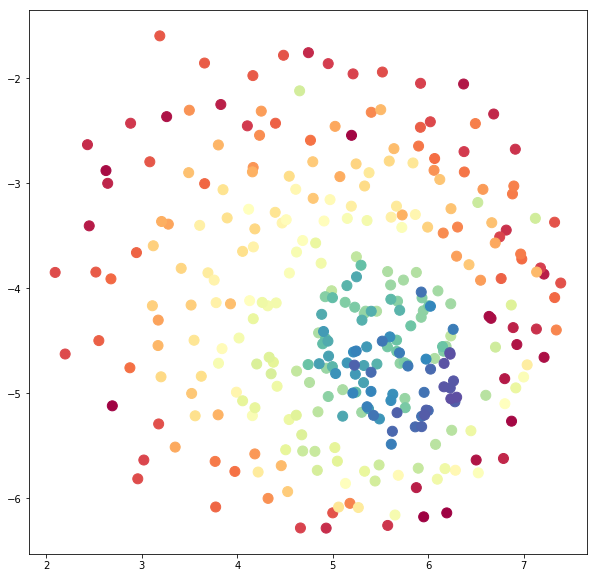

In [67]:
standard_embedding_jac = umap.UMAP(random_state=42,n_neighbors=10,metric='jaccard').fit_transform(cordata_value)
x = np.linspace(1,10,319)
plt.figure(figsize=(10,10))
plt.scatter(standard_embedding_jac[:, 0], standard_embedding_jac[:, 1],c=x, cmap='Spectral',s=100)

#plt.legend(labels=trans_name_list,loc='best')

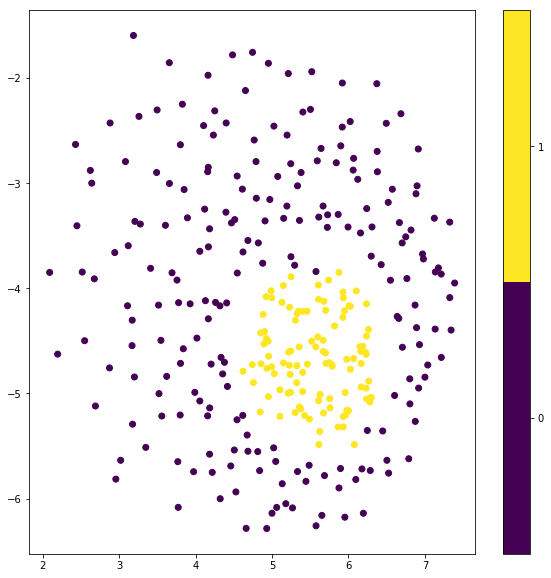

In [68]:
y_cor_umap = DBSCAN(eps = 0.3,min_samples=10).fit_predict(standard_embedding_jac)
plt.figure(figsize=(10,10))
plt.scatter(standard_embedding_jac[:, 0], standard_embedding_jac[:, 1], c=y_cor_umap+1)
cbar = plt.colorbar(boundaries=np.arange(3)-0.5)
labels=[0,1]
cbar.set_ticks(np.arange(2))
cbar.set_ticklabels(labels)

plt.show()

In [69]:
y_cor_umap

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,
       -1,  0,  0,  0,  0

# Using umap on pred_data

H:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype float32 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)
H:\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


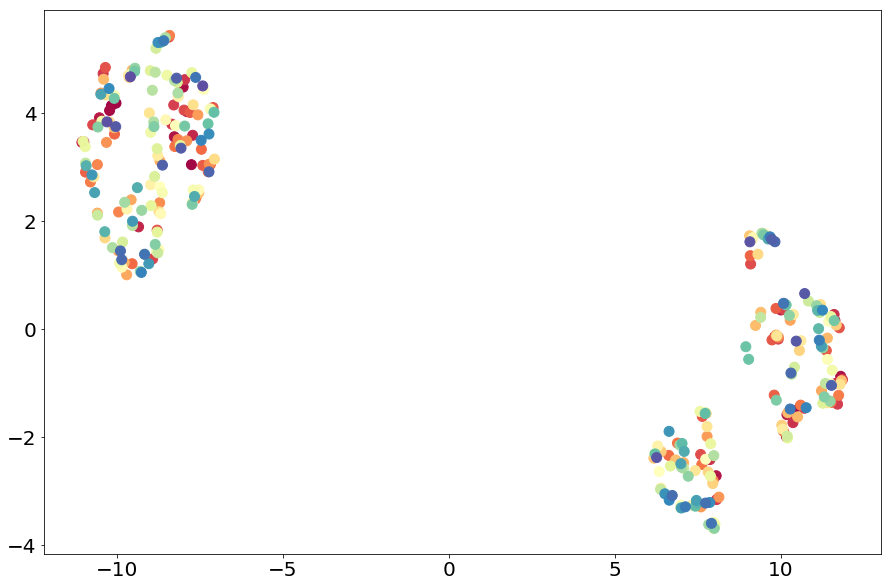

In [70]:
standard_embedding = umap.UMAP(random_state=42,n_neighbors=10,metric='jaccard',n_components=2).fit_transform(pred_data)
x = np.linspace(1,10,319)
plt.figure(figsize=(15,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1],c=x, cmap='Spectral',s=100)

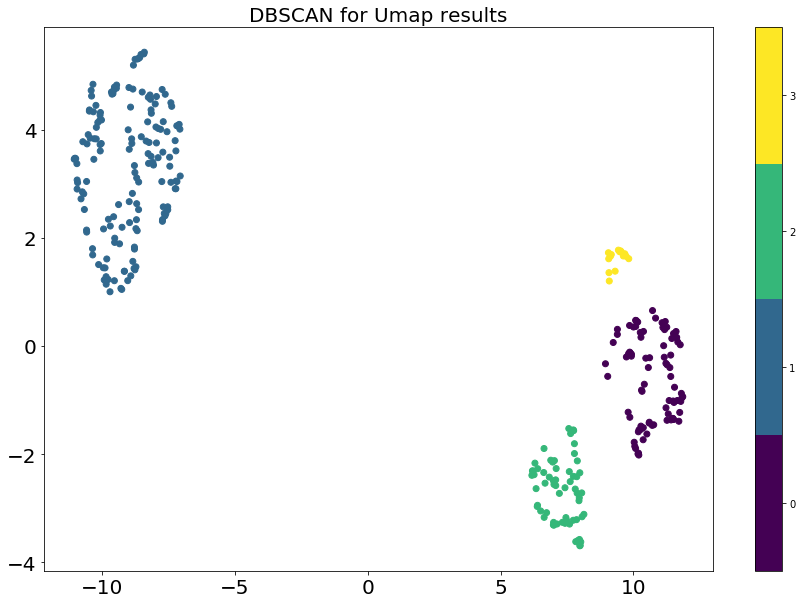

In [71]:
y_pred_umap = DBSCAN(eps = 0.7,min_samples=10).fit_predict(standard_embedding)
plt.figure(figsize=(15,10))
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=y_pred_umap)
cbar = plt.colorbar(boundaries=np.arange(5)-0.5)
labels=[0,1,2,3]
cbar.set_ticks(np.arange(4))
cbar.set_ticklabels(labels)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("DBSCAN for Umap results",fontsize=20)
plt.show()

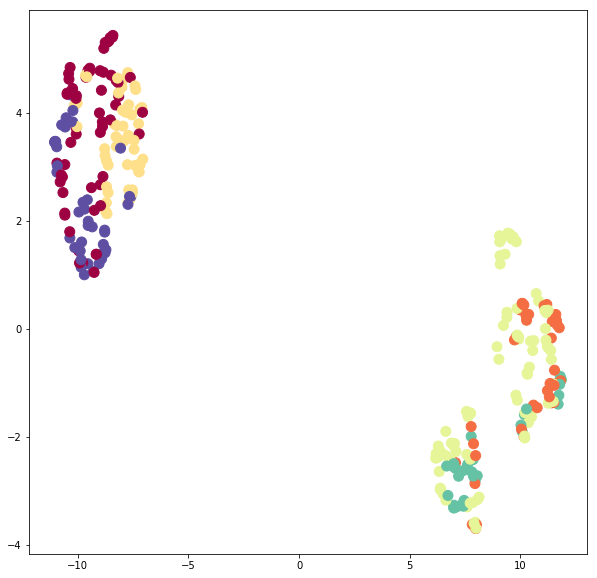

In [72]:
import sklearn.cluster as cluster
kmeans_labels = cluster.KMeans(n_clusters=6,random_state=42).fit_predict(pred_data)
plt.figure(figsize=(10,10))
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, cmap='Spectral',s=100)

In [73]:
y_pred_umap

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 3, 2,
       1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 3, 1, 1, 1, 1, 2, 0, 1,
       1, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0,
       2, 3, 3, 1, 2, 2, 1, 0, 0, 2, 0, 2, 1, 3, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 2, 0, 2, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 2, 3, 1, 1, 3, 3, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       0, 1, 1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1,
       1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1,
       1, 1, 1, 3, 2, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 2, 2, 0, 1, 1, 1,
       0, 0, 1, 3, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 0,
       1, 1, 2, 1, 3, 1, 1, 2, 1, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 0,
       2, 1, 0, 1, 3, 0, 2, 1, 0, 1, 0, 1, 2, 2, 2,

In [74]:
new_dic_umap=getNewDic(trans_name_list,y_pred_umap)
dic_umap_class0=getClass(new_dic_umap,0)
dic_umap_class1=getClass(new_dic_umap,1)
dic_umap_class2=getClass(new_dic_umap,2)
dic_umap_class3=getClass(new_dic_umap,3)

## Compare the jaccord similarity of cluster 0 in PCA to all class in Umap

In [75]:
pca0_to_umap0_jac=jaccard_similarity(dic_pca_class0,dic_umap_class0)
pca0_to_umap0_jac

['EMBV3_22640', 'EMBV3_30293', 'EMBV3_43440', 'EMBV3_22132', 'EMBV3_35013', 'EMBV3_34629', 'EMBV3_12238', 'EMBV3_26710', 'EMBV3_07816', 'EMBV3_11724', 'EMBV3_29901', 'EMBV3_38154', 'EMBV3_32407', 'EMBV3_23352', 'EMBV3_30932', 'EMBV3_18319', 'EMBV3_29621', 'EMBV3_00730', 'EMBV3_01963', 'EMBV3_27041', 'EMBV3_12232', 'EMBV3_14555', 'EMBV3_14527', 'EMBV3_31308', 'EMBV3_31515']


0.25

In [76]:
pca0_to_umap1_jac=jaccard_similarity(dic_pca_class0,dic_umap_class1)
pca0_to_umap1_jac

[]


0.0

In [77]:
pca0_to_umap2_jac=jaccard_similarity(dic_pca_class0,dic_umap_class2)
pca0_to_umap2_jac

['EMBV3_11034', 'EMBV3_29195', 'EMBV3_03757', 'EMBV3_19554', 'EMBV3_20857', 'EMBV3_26914', 'EMBV3_28192', 'EMBV3_38340', 'EMBV3_15661', 'EMBV3_40194', 'EMBV3_18935', 'EMBV3_33952', 'EMBV3_23730', 'EMBV3_35342', 'EMBV3_43227', 'EMBV3_03766']


0.18181818181818182

In [78]:
pca0_to_umap3_jac=jaccard_similarity(dic_pca_class0,dic_umap_class3)
pca0_to_umap3_jac

[]


0.0

## Compare the jaccord similarity of cluster 1 in PCA to all class in umap

In [79]:
pca1_to_umap0_jac=jaccard_similarity(dic_pca_class1,dic_umap_class0)
pca1_to_umap0_jac

['EMBV3_18349', 'EMBV3_20144', 'EMBV3_04354', 'EMBV3_19353', 'EMBV3_27982', 'EMBV3_09715', 'EMBV3_29667', 'EMBV3_18675', 'EMBV3_03637', 'EMBV3_03794', 'EMBV3_36296', 'EMBV3_08315', 'EMBV3_21150', 'EMBV3_26115', 'EMBV3_12397', 'EMBV3_27184', 'EMBV3_16476', 'EMBV3_22139', 'EMBV3_33690', 'EMBV3_13357', 'EMBV3_38592', 'EMBV3_09881', 'EMBV3_02644', 'EMBV3_15382', 'EMBV3_03137', 'EMBV3_32008', 'EMBV3_22321', 'EMBV3_25091', 'EMBV3_04815', 'EMBV3_33550', 'EMBV3_03249', 'EMBV3_11126', 'EMBV3_23348', 'EMBV3_01746', 'EMBV3_29577', 'EMBV3_17499', 'EMBV3_32617', 'EMBV3_12962', 'EMBV3_03741', 'EMBV3_10391', 'EMBV3_10009', 'EMBV3_09323', 'EMBV3_40333', 'EMBV3_15137', 'EMBV3_38302', 'EMBV3_39314', 'EMBV3_20253', 'EMBV3_17764', 'EMBV3_43676', 'EMBV3_37551', 'EMBV3_21950', 'EMBV3_28438', 'EMBV3_32746', 'EMBV3_02854', 'EMBV3_39217', 'EMBV3_19543']


0.1891891891891892

In [80]:
pca1_to_umap1_jac=jaccard_similarity(dic_pca_class1,dic_umap_class1)
pca1_to_umap1_jac

['EMBV3_10035', 'EMBV3_35502', 'EMBV3_39558', 'EMBV3_04713', 'EMBV3_21795', 'EMBV3_31450', 'EMBV3_32250', 'EMBV3_07113', 'EMBV3_26574', 'EMBV3_05327', 'EMBV3_00387', 'EMBV3_06553', 'EMBV3_41725', 'EMBV3_37898', 'EMBV3_40713', 'EMBV3_42829', 'EMBV3_16120', 'EMBV3_33890', 'EMBV3_17012', 'EMBV3_40602', 'EMBV3_34532', 'EMBV3_16793', 'EMBV3_21639', 'EMBV3_38171', 'EMBV3_09391', 'EMBV3_37588', 'EMBV3_08281', 'EMBV3_23136', 'EMBV3_36880', 'EMBV3_26465', 'EMBV3_02482', 'EMBV3_10091', 'EMBV3_04113', 'EMBV3_20495', 'EMBV3_33638', 'EMBV3_15000', 'EMBV3_31178', 'EMBV3_36312', 'EMBV3_33527', 'EMBV3_26125', 'EMBV3_03529', 'EMBV3_11544', 'EMBV3_17057', 'EMBV3_15267', 'EMBV3_00580', 'EMBV3_27211', 'EMBV3_18804', 'EMBV3_25783', 'EMBV3_32404', 'EMBV3_17007', 'EMBV3_11519', 'EMBV3_04866', 'EMBV3_23767', 'EMBV3_18929', 'EMBV3_39758', 'EMBV3_39520', 'EMBV3_09789', 'EMBV3_03045', 'EMBV3_04514', 'EMBV3_34041', 'EMBV3_29318', 'EMBV3_02731', 'EMBV3_42845', 'EMBV3_32069', 'EMBV3_38036', 'EMBV3_26939', 'EMBV3_11

0.585820895522388

In [81]:
pca1_to_umap2_jac=jaccard_similarity(dic_pca_class1,dic_umap_class2)
pca1_to_umap2_jac

['EMBV3_06333', 'EMBV3_01502', 'EMBV3_14991', 'EMBV3_22554', 'EMBV3_00706', 'EMBV3_16591', 'EMBV3_02297', 'EMBV3_17583', 'EMBV3_03231', 'EMBV3_18341', 'EMBV3_33015', 'EMBV3_01236', 'EMBV3_07405', 'EMBV3_29779', 'EMBV3_33974', 'EMBV3_35222', 'EMBV3_20739', 'EMBV3_40717', 'EMBV3_21413', 'EMBV3_30869', 'EMBV3_36106', 'EMBV3_42877', 'EMBV3_42458', 'EMBV3_23433', 'EMBV3_13848', 'EMBV3_00731', 'EMBV3_02990', 'EMBV3_20092', 'EMBV3_09247', 'EMBV3_11501', 'EMBV3_00638', 'EMBV3_04106', 'EMBV3_30297', 'EMBV3_08727', 'EMBV3_17886', 'EMBV3_11752', 'EMBV3_24621', 'EMBV3_10214', 'EMBV3_37626', 'EMBV3_33523']


0.13745704467353953

In [82]:
pca1_to_umap3_jac=jaccard_similarity(dic_pca_class1,dic_umap_class3)
pca1_to_umap3_jac

['EMBV3_18097', 'EMBV3_20746', 'EMBV3_09095', 'EMBV3_31335', 'EMBV3_02698', 'EMBV3_25303', 'EMBV3_00623', 'EMBV3_19476', 'EMBV3_37260', 'EMBV3_09731', 'EMBV3_08592', 'EMBV3_15815', 'EMBV3_10996', 'EMBV3_21807', 'EMBV3_11404']


0.055970149253731345

## Compare the jaccord similarity of cluster 2 in PCA to all class in umap

In [83]:
pca2_to_umap0_jac=jaccard_similarity(dic_pca_class2,dic_umap_class0)
pca2_to_umap0_jac

['EMBV3_08378', 'EMBV3_43391', 'EMBV3_40933']


0.03296703296703297

In [84]:
pca2_to_umap1_jac=jaccard_similarity(dic_pca_class2,dic_umap_class1)
pca2_to_umap1_jac

[]


0.0

In [85]:
pca2_to_umap2_jac=jaccard_similarity(dic_pca_class2,dic_umap_class2)
pca2_to_umap2_jac

['EMBV3_29756', 'EMBV3_27206', 'EMBV3_05769', 'EMBV3_04070', 'EMBV3_43023', 'EMBV3_41939', 'EMBV3_07752']


0.10606060606060606

In [86]:
pca2_to_umap3_jac=jaccard_similarity(dic_pca_class2,dic_umap_class3)
pca2_to_umap3_jac

[]


0.0

## Compare the jaccord similarity of cluster 0 in PCA to all class in t-SNE

In [87]:
pca0_to_tsne0_jac=jaccard_similarity(dic_pca_class0,dic_tsne_class0)
pca0_to_tsne0_jac

[]


0.0

In [88]:
pca0_to_tsne1_jac=jaccard_similarity(dic_pca_class0,dic_tsne_class1)
pca0_to_tsne1_jac

['EMBV3_22640', 'EMBV3_30293', 'EMBV3_43440', 'EMBV3_22132', 'EMBV3_35013', 'EMBV3_34629', 'EMBV3_12238', 'EMBV3_26710', 'EMBV3_07816', 'EMBV3_11724', 'EMBV3_29901', 'EMBV3_38154', 'EMBV3_32407', 'EMBV3_23352', 'EMBV3_30932', 'EMBV3_18319', 'EMBV3_29621', 'EMBV3_00730', 'EMBV3_01963', 'EMBV3_27041', 'EMBV3_12232', 'EMBV3_14555', 'EMBV3_14527', 'EMBV3_31308', 'EMBV3_31515']


0.22935779816513763

In [89]:
pca0_to_tsne2_jac=jaccard_similarity(dic_pca_class0,dic_tsne_class2)
pca0_to_tsne2_jac

[]


0.0

In [90]:
pca0_to_tsne3_jac=jaccard_similarity(dic_pca_class0,dic_tsne_class3)
pca0_to_tsne3_jac

['EMBV3_11034', 'EMBV3_29195', 'EMBV3_03757', 'EMBV3_19554', 'EMBV3_20857', 'EMBV3_26914', 'EMBV3_28192', 'EMBV3_38340', 'EMBV3_15661', 'EMBV3_40194', 'EMBV3_18935', 'EMBV3_33952', 'EMBV3_23730', 'EMBV3_35342', 'EMBV3_43227', 'EMBV3_03766']


0.1797752808988764

## Compare the jaccord similarity of cluster 1 in PCA to all class in t-SNE

In [91]:
pca1_to_tsne0_jac=jaccard_similarity(dic_pca_class1,dic_tsne_class0)
pca1_to_tsne0_jac

['EMBV3_22731', 'EMBV3_38302', 'EMBV3_25783', 'EMBV3_29577', 'EMBV3_17499', 'EMBV3_09881', 'EMBV3_29667']


0.026119402985074626

In [92]:
pca1_to_tsne1_jac=jaccard_similarity(dic_pca_class1,dic_tsne_class1)
pca1_to_tsne1_jac

['EMBV3_20746', 'EMBV3_09095', 'EMBV3_31335', 'EMBV3_18349', 'EMBV3_20144', 'EMBV3_04354', 'EMBV3_19353', 'EMBV3_19476', 'EMBV3_32746', 'EMBV3_27982', 'EMBV3_09731', 'EMBV3_08592', 'EMBV3_09715', 'EMBV3_21807', 'EMBV3_18675', 'EMBV3_03637', 'EMBV3_03794', 'EMBV3_36296', 'EMBV3_08315', 'EMBV3_21150', 'EMBV3_26115', 'EMBV3_02698', 'EMBV3_12397', 'EMBV3_27184', 'EMBV3_16476', 'EMBV3_22139', 'EMBV3_33690', 'EMBV3_37260', 'EMBV3_13357', 'EMBV3_10996', 'EMBV3_38592', 'EMBV3_02644', 'EMBV3_15382', 'EMBV3_11404', 'EMBV3_03137', 'EMBV3_18097', 'EMBV3_32008', 'EMBV3_22321', 'EMBV3_25091', 'EMBV3_04815', 'EMBV3_33550', 'EMBV3_03249', 'EMBV3_25303', 'EMBV3_11126', 'EMBV3_23348', 'EMBV3_01746', 'EMBV3_32617', 'EMBV3_12962', 'EMBV3_03741', 'EMBV3_10391', 'EMBV3_10009', 'EMBV3_09323', 'EMBV3_40333', 'EMBV3_15137', 'EMBV3_39314', 'EMBV3_20253', 'EMBV3_17764', 'EMBV3_43676', 'EMBV3_00623', 'EMBV3_21950', 'EMBV3_28438', 'EMBV3_15815', 'EMBV3_02854', 'EMBV3_39217', 'EMBV3_19543']


0.2195945945945946

In [156]:
tmp=[]
pca1_to_tsne1_list=list(set(dic_pca_class1).intersection(dic_tsne_class1))
for i in trans_name_list:
    if i in pca1_to_tsne1_list:
        tmp.append(trans_name_list.index(i))
tmp

[6,
 11,
 18,
 22,
 23,
 25,
 34,
 38,
 42,
 49,
 51,
 54,
 55,
 58,
 76,
 90,
 101,
 103,
 104,
 105,
 106,
 111,
 112,
 123,
 129,
 134,
 138,
 139,
 147,
 150,
 151,
 162,
 163,
 165,
 176,
 184,
 191,
 194,
 203,
 204,
 207,
 211,
 212,
 223,
 231,
 233,
 235,
 238,
 243,
 245,
 259,
 260,
 263,
 268,
 274,
 285,
 288,
 290,
 291,
 304,
 306,
 308,
 312,
 313,
 315]

In [93]:
pca1_to_tsne2_jac=jaccard_similarity(dic_pca_class1,dic_tsne_class2)
pca1_to_tsne2_jac

['EMBV3_10035', 'EMBV3_35502', 'EMBV3_39558', 'EMBV3_04713', 'EMBV3_21795', 'EMBV3_31450', 'EMBV3_32250', 'EMBV3_07113', 'EMBV3_26574', 'EMBV3_05327', 'EMBV3_00387', 'EMBV3_06553', 'EMBV3_41725', 'EMBV3_37898', 'EMBV3_40713', 'EMBV3_42829', 'EMBV3_16120', 'EMBV3_33890', 'EMBV3_17012', 'EMBV3_40602', 'EMBV3_34532', 'EMBV3_16793', 'EMBV3_21639', 'EMBV3_38171', 'EMBV3_09391', 'EMBV3_37588', 'EMBV3_08281', 'EMBV3_23136', 'EMBV3_36880', 'EMBV3_26465', 'EMBV3_02482', 'EMBV3_10091', 'EMBV3_04113', 'EMBV3_20495', 'EMBV3_33638', 'EMBV3_15000', 'EMBV3_31178', 'EMBV3_36312', 'EMBV3_33527', 'EMBV3_26125', 'EMBV3_03529', 'EMBV3_11544', 'EMBV3_17057', 'EMBV3_15267', 'EMBV3_00580', 'EMBV3_27211', 'EMBV3_18804', 'EMBV3_32404', 'EMBV3_17007', 'EMBV3_11519', 'EMBV3_04866', 'EMBV3_23767', 'EMBV3_18929', 'EMBV3_39758', 'EMBV3_39520', 'EMBV3_09789', 'EMBV3_03045', 'EMBV3_04514', 'EMBV3_34041', 'EMBV3_29318', 'EMBV3_02731', 'EMBV3_42845', 'EMBV3_32069', 'EMBV3_38036', 'EMBV3_26939', 'EMBV3_11774', 'EMBV3_19

0.5783582089552238

In [94]:
pca1_to_tsne3_jac=jaccard_similarity(dic_pca_class1,dic_tsne_class3)
pca1_to_tsne3_jac

['EMBV3_06333', 'EMBV3_01502', 'EMBV3_14991', 'EMBV3_22554', 'EMBV3_00706', 'EMBV3_16591', 'EMBV3_02297', 'EMBV3_17583', 'EMBV3_03231', 'EMBV3_18341', 'EMBV3_33015', 'EMBV3_01236', 'EMBV3_07405', 'EMBV3_29779', 'EMBV3_33974', 'EMBV3_35222', 'EMBV3_20739', 'EMBV3_40717', 'EMBV3_21413', 'EMBV3_30869', 'EMBV3_36106', 'EMBV3_42877', 'EMBV3_42458', 'EMBV3_23433', 'EMBV3_13848', 'EMBV3_00731', 'EMBV3_02990', 'EMBV3_20092', 'EMBV3_09247', 'EMBV3_11501', 'EMBV3_00638', 'EMBV3_04106', 'EMBV3_30297', 'EMBV3_08727', 'EMBV3_17886', 'EMBV3_11752', 'EMBV3_24621', 'EMBV3_37551', 'EMBV3_10214', 'EMBV3_37626', 'EMBV3_33523']


0.140893470790378

## Compare the jaccord similarity of cluster 2 in PCA to all class in t-SNE

In [95]:
pca2_to_tsne0_jac=jaccard_similarity(dic_pca_class2,dic_tsne_class0)
pca2_to_tsne0_jac

[]


0.0

In [96]:
pca2_to_tsne1_jac=jaccard_similarity(dic_pca_class2,dic_tsne_class1)
pca2_to_tsne1_jac

['EMBV3_08378', 'EMBV3_43391', 'EMBV3_40933']


0.03

In [97]:
pca2_to_tsne2_jac=jaccard_similarity(dic_pca_class2,dic_tsne_class2)
pca2_to_tsne2_jac

[]


0.0

In [98]:
pca2_to_tsne3_jac=jaccard_similarity(dic_pca_class2,dic_tsne_class3)
pca2_to_tsne3_jac

['EMBV3_29756', 'EMBV3_27206', 'EMBV3_05769', 'EMBV3_04070', 'EMBV3_43023', 'EMBV3_41939', 'EMBV3_07752']


0.1044776119402985

## Compare the jaccord similarity of cluster 0 in tsne to all class in umap

In [99]:
tsne0_to_umap0_jac=jaccard_similarity(dic_tsne_class0,dic_umap_class0)
tsne0_to_umap0_jac

['EMBV3_38302', 'EMBV3_29577', 'EMBV3_17499', 'EMBV3_09881', 'EMBV3_29667']


0.05813953488372093

In [100]:
tsne0_to_umap1_jac=jaccard_similarity(dic_tsne_class0,dic_umap_class1)
tsne0_to_umap1_jac

['EMBV3_22731', 'EMBV3_25783']


0.012345679012345678

In [101]:
tsne0_to_umap2_jac=jaccard_similarity(dic_tsne_class0,dic_umap_class2)
tsne0_to_umap2_jac

[]


0.0

In [102]:
tsne0_to_umap3_jac=jaccard_similarity(dic_tsne_class0,dic_umap_class3)
tsne0_to_umap3_jac

[]


0.0

## Compare the jaccord similarity of cluster 1 in tsne to all class in umap

In [103]:
tsne1_to_umap0_jac=jaccard_similarity(dic_tsne_class1,dic_umap_class0)
tsne1_to_umap0_jac

['EMBV3_22640', 'EMBV3_30293', 'EMBV3_43440', 'EMBV3_22132', 'EMBV3_20144', 'EMBV3_18349', 'EMBV3_04354', 'EMBV3_19353', 'EMBV3_27982', 'EMBV3_35013', 'EMBV3_09715', 'EMBV3_34629', 'EMBV3_18675', 'EMBV3_12238', 'EMBV3_40933', 'EMBV3_03637', 'EMBV3_08378', 'EMBV3_03794', 'EMBV3_26710', 'EMBV3_36296', 'EMBV3_07816', 'EMBV3_11724', 'EMBV3_29901', 'EMBV3_26115', 'EMBV3_38154', 'EMBV3_21150', 'EMBV3_12397', 'EMBV3_27184', 'EMBV3_16476', 'EMBV3_22139', 'EMBV3_33690', 'EMBV3_13357', 'EMBV3_38592', 'EMBV3_02644', 'EMBV3_15382', 'EMBV3_32407', 'EMBV3_23352', 'EMBV3_03137', 'EMBV3_30932', 'EMBV3_32008', 'EMBV3_22321', 'EMBV3_25091', 'EMBV3_04815', 'EMBV3_33550', 'EMBV3_18319', 'EMBV3_03249', 'EMBV3_08315', 'EMBV3_11126', 'EMBV3_23348', 'EMBV3_01746', 'EMBV3_32617', 'EMBV3_43391', 'EMBV3_29621', 'EMBV3_00730', 'EMBV3_01963', 'EMBV3_03741', 'EMBV3_12962', 'EMBV3_10391', 'EMBV3_27041', 'EMBV3_10009', 'EMBV3_09323', 'EMBV3_40333', 'EMBV3_15137', 'EMBV3_39314', 'EMBV3_20253', 'EMBV3_17764', 'EMBV3_43

0.7878787878787878

In [104]:
tsne1_to_umap1_jac=jaccard_similarity(dic_tsne_class1,dic_umap_class1)
tsne1_to_umap1_jac

[]


0.0

In [105]:
tsne1_to_umap2_jac=jaccard_similarity(dic_tsne_class1,dic_umap_class2)
tsne1_to_umap2_jac

[]


0.0

In [106]:
tsne1_to_umap3_jac=jaccard_similarity(dic_tsne_class1,dic_umap_class3)
tsne1_to_umap3_jac

['EMBV3_18097', 'EMBV3_20746', 'EMBV3_09095', 'EMBV3_31335', 'EMBV3_02698', 'EMBV3_25303', 'EMBV3_00623', 'EMBV3_19476', 'EMBV3_37260', 'EMBV3_09731', 'EMBV3_08592', 'EMBV3_15815', 'EMBV3_10996', 'EMBV3_21807', 'EMBV3_11404']


0.16129032258064516

## Compare the jaccord similarity of cluster 2 in tsne to all class in umap

In [107]:
tsne2_to_umap0_jac=jaccard_similarity(dic_tsne_class2,dic_umap_class0)
tsne2_to_umap0_jac

[]


0.0

In [108]:
tsne2_to_umap1_jac=jaccard_similarity(dic_tsne_class2,dic_umap_class1)
tsne2_to_umap1_jac

['EMBV3_10035', 'EMBV3_35502', 'EMBV3_39558', 'EMBV3_04713', 'EMBV3_21795', 'EMBV3_31450', 'EMBV3_32250', 'EMBV3_07113', 'EMBV3_26574', 'EMBV3_05327', 'EMBV3_00387', 'EMBV3_06553', 'EMBV3_41725', 'EMBV3_37898', 'EMBV3_40713', 'EMBV3_42829', 'EMBV3_16120', 'EMBV3_33890', 'EMBV3_17012', 'EMBV3_40602', 'EMBV3_34532', 'EMBV3_16793', 'EMBV3_21639', 'EMBV3_38171', 'EMBV3_09391', 'EMBV3_37588', 'EMBV3_08281', 'EMBV3_23136', 'EMBV3_36880', 'EMBV3_26465', 'EMBV3_02482', 'EMBV3_10091', 'EMBV3_04113', 'EMBV3_20495', 'EMBV3_33638', 'EMBV3_15000', 'EMBV3_31178', 'EMBV3_36312', 'EMBV3_33527', 'EMBV3_26125', 'EMBV3_03529', 'EMBV3_11544', 'EMBV3_17057', 'EMBV3_15267', 'EMBV3_00580', 'EMBV3_27211', 'EMBV3_18804', 'EMBV3_32404', 'EMBV3_17007', 'EMBV3_11519', 'EMBV3_04866', 'EMBV3_23767', 'EMBV3_18929', 'EMBV3_39758', 'EMBV3_39520', 'EMBV3_09789', 'EMBV3_03045', 'EMBV3_04514', 'EMBV3_34041', 'EMBV3_29318', 'EMBV3_02731', 'EMBV3_42845', 'EMBV3_32069', 'EMBV3_38036', 'EMBV3_26939', 'EMBV3_11774', 'EMBV3_19

0.9872611464968153

In [109]:
tsne2_to_umap2_jac=jaccard_similarity(dic_tsne_class2,dic_umap_class2)
tsne2_to_umap2_jac

[]


0.0

In [110]:
tsne2_to_umap3_jac=jaccard_similarity(dic_tsne_class2,dic_umap_class3)
tsne2_to_umap3_jac

[]


0.0

## Compare the jaccord similarity of cluster 3 in tsne to all class in umap

In [111]:
tsne3_to_umap0_jac=jaccard_similarity(dic_tsne_class3,dic_umap_class0)
tsne3_to_umap0_jac

['EMBV3_37551']


0.006802721088435374

In [112]:
tsne3_to_umap1_jac=jaccard_similarity(dic_tsne_class3,dic_umap_class1)
tsne3_to_umap1_jac

[]


0.0

In [113]:
tsne3_to_umap2_jac=jaccard_similarity(dic_tsne_class3,dic_umap_class2)
tsne3_to_umap2_jac

['EMBV3_06333', 'EMBV3_28192', 'EMBV3_01502', 'EMBV3_14991', 'EMBV3_22554', 'EMBV3_40194', 'EMBV3_16591', 'EMBV3_00706', 'EMBV3_02297', 'EMBV3_17583', 'EMBV3_03231', 'EMBV3_33952', 'EMBV3_43023', 'EMBV3_04070', 'EMBV3_23730', 'EMBV3_18341', 'EMBV3_11034', 'EMBV3_33015', 'EMBV3_29195', 'EMBV3_07405', 'EMBV3_03757', 'EMBV3_01236', 'EMBV3_29779', 'EMBV3_33974', 'EMBV3_35222', 'EMBV3_18935', 'EMBV3_20739', 'EMBV3_40717', 'EMBV3_21413', 'EMBV3_03766', 'EMBV3_07752', 'EMBV3_29756', 'EMBV3_30869', 'EMBV3_42877', 'EMBV3_42458', 'EMBV3_23433', 'EMBV3_19554', 'EMBV3_36106', 'EMBV3_13848', 'EMBV3_00731', 'EMBV3_27206', 'EMBV3_38340', 'EMBV3_15661', 'EMBV3_05769', 'EMBV3_02990', 'EMBV3_20092', 'EMBV3_09247', 'EMBV3_11501', 'EMBV3_00638', 'EMBV3_04106', 'EMBV3_41939', 'EMBV3_35342', 'EMBV3_43227', 'EMBV3_30297', 'EMBV3_08727', 'EMBV3_17886', 'EMBV3_20857', 'EMBV3_11752', 'EMBV3_26914', 'EMBV3_24621', 'EMBV3_10214', 'EMBV3_37626', 'EMBV3_33523']


0.984375

In [114]:
tsne3_to_umap3_jac=jaccard_similarity(dic_tsne_class3,dic_umap_class3)
tsne3_to_umap3_jac

[]


0.0

In [257]:
qanalysis_cluster=pd.read_csv("BMA network clusters.csv")
qanalysis_cluster['Cluster']=qanalysis_cluster['Cluster']-1
qanalysis_cluster_0=list(qanalysis_cluster[qanalysis_cluster['Cluster']==0]['Gene Name'])
qanalysis_cluster_1=list(qanalysis_cluster[qanalysis_cluster['Cluster']==1]['Gene Name'])

## Compare the jaccord similarity of PCA cluster 0 to all class in Q-analysis

In [258]:
pca0_to_qanalysis0_jac=jaccard_similarity(dic_pca_class0,qanalysis_cluster_0)
pca0_to_qanalysis0_jac

['EMBV3_11034', 'EMBV3_11724', 'EMBV3_29901', 'EMBV3_12232', 'EMBV3_40194', 'EMBV3_14527', 'EMBV3_33952', 'EMBV3_29621', 'EMBV3_00730', 'EMBV3_14555']


0.09433962264150944

In [259]:
pca0_to_qanalysis1_jac=jaccard_similarity(dic_pca_class0,qanalysis_cluster_1)
pca0_to_qanalysis1_jac

['EMBV3_30293', 'EMBV3_22132', 'EMBV3_38154', 'EMBV3_38340', 'EMBV3_15661', 'EMBV3_18935', 'EMBV3_35342', 'EMBV3_35013', 'EMBV3_43227', 'EMBV3_31308', 'EMBV3_23352']


0.11224489795918367

## Compare the jaccord similarity of PCA cluster 1 to all class in Q-analysis

In [260]:
pca1_to_qanalysis0_jac=jaccard_similarity(dic_pca_class1,qanalysis_cluster_0)
pca1_to_qanalysis0_jac

['EMBV3_20746', 'EMBV3_35502', 'EMBV3_09095', 'EMBV3_31335', 'EMBV3_18349', 'EMBV3_30249', 'EMBV3_04354', 'EMBV3_21795', 'EMBV3_27070', 'EMBV3_19476', 'EMBV3_18059', 'EMBV3_22554', 'EMBV3_11544', 'EMBV3_32250', 'EMBV3_18341', 'EMBV3_07113', 'EMBV3_22731', 'EMBV3_07405', 'EMBV3_37898', 'EMBV3_06553', 'EMBV3_40713', 'EMBV3_16443', 'EMBV3_37260', 'EMBV3_10019', 'EMBV3_40717', 'EMBV3_13357', 'EMBV3_38592', 'EMBV3_23767', 'EMBV3_09860', 'EMBV3_09789', 'EMBV3_18097', 'EMBV3_03045', 'EMBV3_20772', 'EMBV3_02920', 'EMBV3_29318', 'EMBV3_33550', 'EMBV3_02040', 'EMBV3_26826', 'EMBV3_11126', 'EMBV3_16014', 'EMBV3_43215', 'EMBV3_12193', 'EMBV3_13137', 'EMBV3_09247', 'EMBV3_00638', 'EMBV3_20599', 'EMBV3_11449', 'EMBV3_09323', 'EMBV3_17886', 'EMBV3_12200', 'EMBV3_43676', 'EMBV3_19147', 'EMBV3_24621', 'EMBV3_34178', 'EMBV3_26465', 'EMBV3_29586', 'EMBV3_18274', 'EMBV3_12959', 'EMBV3_01993', 'EMBV3_15281', 'EMBV3_33523']


0.21631205673758866

In [261]:
pca1_to_qanalysis1_jac=jaccard_similarity(dic_pca_class1,qanalysis_cluster_1)
pca1_to_qanalysis1_jac

['EMBV3_10035', 'EMBV3_15000', 'EMBV3_31178', 'EMBV3_36312', 'EMBV3_17583', 'EMBV3_20737', 'EMBV3_37312', 'EMBV3_27982', 'EMBV3_26125', 'EMBV3_08592', 'EMBV3_31450', 'EMBV3_13723', 'EMBV3_29667', 'EMBV3_21807', 'EMBV3_35158', 'EMBV3_01531', 'EMBV3_12465', 'EMBV3_01236', 'EMBV3_08315', 'EMBV3_26574', 'EMBV3_02698', 'EMBV3_00387', 'EMBV3_29779', 'EMBV3_01383', 'EMBV3_22139', 'EMBV3_16120', 'EMBV3_33890', 'EMBV3_14778', 'EMBV3_17007', 'EMBV3_18929', 'EMBV3_39552', 'EMBV3_39520', 'EMBV3_15296', 'EMBV3_11404', 'EMBV3_13848', 'EMBV3_22321', 'EMBV3_32008', 'EMBV3_34041', 'EMBV3_19426', 'EMBV3_25303', 'EMBV3_21639', 'EMBV3_38171', 'EMBV3_01808', 'EMBV3_35167', 'EMBV3_10009', 'EMBV3_40333', 'EMBV3_39314', 'EMBV3_37424', 'EMBV3_23136', 'EMBV3_36880', 'EMBV3_10214', 'EMBV3_02482', 'EMBV3_01879', 'EMBV3_17716', 'EMBV3_12627', 'EMBV3_02854', 'EMBV3_32249']


0.20430107526881722

## Compare the jaccord similarity of PCA cluster 2 to all class in Q-analysis

In [262]:
pca2_to_qanalysis0_jac=jaccard_similarity(dic_pca_class2,qanalysis_cluster_0)
pca2_to_qanalysis0_jac

['EMBV3_08378', 'EMBV3_40933', 'EMBV3_43023', 'EMBV3_07752']


0.04938271604938271

In [263]:
pca2_to_qanalysis1_jac=jaccard_similarity(dic_pca_class2,qanalysis_cluster_1)
pca2_to_qanalysis1_jac

[]


0.0

## Compare the jaccord similarity of t-SNE cluster 0 to all class in Q-analysis

In [264]:
tsne0_to_qanalysis0_jac=jaccard_similarity(dic_tsne_class0,qanalysis_cluster_0)
tsne0_to_qanalysis0_jac

['EMBV3_22731']


0.012345679012345678

In [265]:
tsne0_to_qanalysis1_jac=jaccard_similarity(dic_tsne_class0,qanalysis_cluster_1)
tsne0_to_qanalysis1_jac

['EMBV3_29667']


0.013513513513513514

## Compare the jaccord similarity of t-SNE cluster 1 to all class in Q-analysis

In [266]:
tsne1_to_qanalysis0_jac=jaccard_similarity(dic_tsne_class1,qanalysis_cluster_0)
tsne1_to_qanalysis0_jac

['EMBV3_20746', 'EMBV3_09095', 'EMBV3_31335', 'EMBV3_18349', 'EMBV3_04354', 'EMBV3_19476', 'EMBV3_40933', 'EMBV3_08378', 'EMBV3_11724', 'EMBV3_29901', 'EMBV3_37260', 'EMBV3_13357', 'EMBV3_38592', 'EMBV3_18097', 'EMBV3_33550', 'EMBV3_11126', 'EMBV3_29621', 'EMBV3_00730', 'EMBV3_09323', 'EMBV3_43676', 'EMBV3_12232', 'EMBV3_14527', 'EMBV3_14555']


0.15862068965517243

In [267]:
tsne1_to_qanalysis1_jac=jaccard_similarity(dic_tsne_class1,qanalysis_cluster_1)
tsne1_to_qanalysis1_jac

['EMBV3_08315', 'EMBV3_40333', 'EMBV3_39314', 'EMBV3_02698', 'EMBV3_22132', 'EMBV3_30293', 'EMBV3_38154', 'EMBV3_22321', 'EMBV3_32008', 'EMBV3_22139', 'EMBV3_25303', 'EMBV3_27982', 'EMBV3_11404', 'EMBV3_08592', 'EMBV3_02854', 'EMBV3_21807', 'EMBV3_35013', 'EMBV3_31308', 'EMBV3_23352', 'EMBV3_10009']


0.14184397163120568

## Compare the jaccord similarity of t-SNE cluster 2，3 to all class in Q-analysis

In [268]:
tsne2_to_qanalysis0_jac=jaccard_similarity(dic_tsne_class2,qanalysis_cluster_0)
tsne2_to_qanalysis0_jac

['EMBV3_35502', 'EMBV3_30249', 'EMBV3_21795', 'EMBV3_27070', 'EMBV3_18059', 'EMBV3_11544', 'EMBV3_32250', 'EMBV3_07113', 'EMBV3_37898', 'EMBV3_06553', 'EMBV3_40713', 'EMBV3_16443', 'EMBV3_10019', 'EMBV3_23767', 'EMBV3_09860', 'EMBV3_09789', 'EMBV3_03045', 'EMBV3_20772', 'EMBV3_02920', 'EMBV3_29318', 'EMBV3_02040', 'EMBV3_26826', 'EMBV3_16014', 'EMBV3_43215', 'EMBV3_13137', 'EMBV3_20599', 'EMBV3_11449', 'EMBV3_12200', 'EMBV3_19147', 'EMBV3_34178', 'EMBV3_26465', 'EMBV3_29586', 'EMBV3_18274', 'EMBV3_12959', 'EMBV3_01993', 'EMBV3_15281', 'EMBV3_12193']


0.19170984455958548

In [269]:
tsne2_to_qanalysis1_jac=jaccard_similarity(dic_tsne_class2,qanalysis_cluster_1)
tsne2_to_qanalysis1_jac

['EMBV3_10035', 'EMBV3_15000', 'EMBV3_31178', 'EMBV3_36312', 'EMBV3_20737', 'EMBV3_37312', 'EMBV3_26125', 'EMBV3_31450', 'EMBV3_13723', 'EMBV3_35158', 'EMBV3_01531', 'EMBV3_12465', 'EMBV3_26574', 'EMBV3_00387', 'EMBV3_01383', 'EMBV3_16120', 'EMBV3_33890', 'EMBV3_14778', 'EMBV3_17007', 'EMBV3_18929', 'EMBV3_39552', 'EMBV3_39520', 'EMBV3_15296', 'EMBV3_34041', 'EMBV3_19426', 'EMBV3_21639', 'EMBV3_38171', 'EMBV3_01808', 'EMBV3_35167', 'EMBV3_37424', 'EMBV3_23136', 'EMBV3_36880', 'EMBV3_02482', 'EMBV3_01879', 'EMBV3_17716', 'EMBV3_12627', 'EMBV3_32249']


0.1989247311827957

In [271]:
tsne3_to_qanalysis0_jac=jaccard_similarity(dic_tsne_class3,qanalysis_cluster_0)
tsne3_to_qanalysis0_jac

['EMBV3_11034', 'EMBV3_07752', 'EMBV3_07405', 'EMBV3_17886', 'EMBV3_24621', 'EMBV3_22554', 'EMBV3_40194', 'EMBV3_33952', 'EMBV3_43023', 'EMBV3_09247', 'EMBV3_40717', 'EMBV3_00638', 'EMBV3_18341', 'EMBV3_33523']


0.112

In [273]:
tsne3_to_qanalysis0_jac=jaccard_similarity(dic_tsne_class3,qanalysis_cluster_1)
tsne3_to_qanalysis0_jac

['EMBV3_01236', 'EMBV3_13848', 'EMBV3_29779', 'EMBV3_38340', 'EMBV3_15661', 'EMBV3_10214', 'EMBV3_17583', 'EMBV3_18935', 'EMBV3_35342', 'EMBV3_43227']


0.08196721311475409

## Compare the jaccord similarity of UMAP cluster 0 to all class in Q-analysis

In [275]:
umap0_to_qanalysis0_jac=jaccard_similarity(dic_umap_class0,qanalysis_cluster_0)
umap0_to_qanalysis0_jac

['EMBV3_08378', 'EMBV3_09323', 'EMBV3_11724', 'EMBV3_29901', 'EMBV3_18349', 'EMBV3_04354', 'EMBV3_43676', 'EMBV3_33550', 'EMBV3_12232', 'EMBV3_11126', 'EMBV3_14527', 'EMBV3_14555', 'EMBV3_29621', 'EMBV3_00730', 'EMBV3_13357', 'EMBV3_38592', 'EMBV3_40933']


0.11971830985915492

In [276]:
umap0_to_qanalysis1_jac=jaccard_similarity(dic_umap_class0,qanalysis_cluster_1)
umap0_to_qanalysis1_jac

['EMBV3_08315', 'EMBV3_40333', 'EMBV3_39314', 'EMBV3_30293', 'EMBV3_22132', 'EMBV3_22321', 'EMBV3_38154', 'EMBV3_32008', 'EMBV3_22139', 'EMBV3_27982', 'EMBV3_29667', 'EMBV3_31308', 'EMBV3_35013', 'EMBV3_02854', 'EMBV3_23352', 'EMBV3_10009']


0.11764705882352941

## Compare the jaccord similarity of UMAP cluster 1 to all class in Q-analysis

In [277]:
umap1_to_qanalysis0_jac=jaccard_similarity(dic_umap_class1,qanalysis_cluster_0)
umap1_to_qanalysis0_jac

['EMBV3_35502', 'EMBV3_30249', 'EMBV3_21795', 'EMBV3_27070', 'EMBV3_18059', 'EMBV3_11544', 'EMBV3_32250', 'EMBV3_07113', 'EMBV3_22731', 'EMBV3_37898', 'EMBV3_06553', 'EMBV3_40713', 'EMBV3_16443', 'EMBV3_10019', 'EMBV3_23767', 'EMBV3_09860', 'EMBV3_09789', 'EMBV3_03045', 'EMBV3_20772', 'EMBV3_02920', 'EMBV3_29318', 'EMBV3_02040', 'EMBV3_26826', 'EMBV3_16014', 'EMBV3_43215', 'EMBV3_13137', 'EMBV3_20599', 'EMBV3_11449', 'EMBV3_12200', 'EMBV3_19147', 'EMBV3_34178', 'EMBV3_26465', 'EMBV3_29586', 'EMBV3_18274', 'EMBV3_12959', 'EMBV3_01993', 'EMBV3_15281', 'EMBV3_12193']


0.1958762886597938

In [278]:
umap1_to_qanalysis1_jac=jaccard_similarity(dic_umap_class1,qanalysis_cluster_1)
umap1_to_qanalysis1_jac

['EMBV3_10035', 'EMBV3_15000', 'EMBV3_31178', 'EMBV3_36312', 'EMBV3_20737', 'EMBV3_37312', 'EMBV3_26125', 'EMBV3_31450', 'EMBV3_13723', 'EMBV3_35158', 'EMBV3_01531', 'EMBV3_12465', 'EMBV3_26574', 'EMBV3_00387', 'EMBV3_01383', 'EMBV3_16120', 'EMBV3_33890', 'EMBV3_14778', 'EMBV3_17007', 'EMBV3_18929', 'EMBV3_39552', 'EMBV3_39520', 'EMBV3_15296', 'EMBV3_34041', 'EMBV3_19426', 'EMBV3_21639', 'EMBV3_38171', 'EMBV3_01808', 'EMBV3_35167', 'EMBV3_37424', 'EMBV3_23136', 'EMBV3_36880', 'EMBV3_02482', 'EMBV3_01879', 'EMBV3_17716', 'EMBV3_12627', 'EMBV3_32249']


0.19680851063829788

## Compare the jaccord similarity of UMAP cluster 2,3 to all class in Q-analysis

In [279]:
umap2_to_qanalysis0_jac=jaccard_similarity(dic_umap_class2,qanalysis_cluster_0)
umap2_to_qanalysis0_jac

['EMBV3_11034', 'EMBV3_07752', 'EMBV3_07405', 'EMBV3_17886', 'EMBV3_24621', 'EMBV3_22554', 'EMBV3_40194', 'EMBV3_33952', 'EMBV3_43023', 'EMBV3_09247', 'EMBV3_40717', 'EMBV3_00638', 'EMBV3_18341', 'EMBV3_33523']


0.11290322580645161

In [280]:
umap2_to_qanalysis1_jac=jaccard_similarity(dic_umap_class2,qanalysis_cluster_1)
umap2_to_qanalysis1_jac

['EMBV3_01236', 'EMBV3_13848', 'EMBV3_29779', 'EMBV3_38340', 'EMBV3_15661', 'EMBV3_10214', 'EMBV3_17583', 'EMBV3_18935', 'EMBV3_35342', 'EMBV3_43227']


0.08264462809917356

In [283]:
umap3_to_qanalysis0_jac=jaccard_similarity(dic_umap_class3,qanalysis_cluster_0)
umap3_to_qanalysis0_jac

['EMBV3_18097', 'EMBV3_20746', 'EMBV3_09095', 'EMBV3_31335', 'EMBV3_19476', 'EMBV3_37260']


0.07142857142857142

In [284]:
umap3_to_qanalysis1_jac=jaccard_similarity(dic_umap_class3,qanalysis_cluster_1)
umap3_to_qanalysis1_jac

['EMBV3_02698', 'EMBV3_25303', 'EMBV3_08592', 'EMBV3_21807', 'EMBV3_11404']


0.0641025641025641

## Compare the jaccord similarity of UMAP cluster 0 to all class in Q-analysis

In [ ]:
umap0_to_qanalysis0_jac=jaccard_similarity(dic_umap_class0,qanalysis_cluster_0)
umap0_to_qanalysis0_jac

In [115]:
import gudhi as gd
import gudhi

# Clustering by using Kmeans

In [116]:
trans_name_list

['EMBV3_30293',
 'EMBV3_26574',
 'EMBV3_33890',
 'EMBV3_14778',
 'EMBV3_36312',
 'EMBV3_31450',
 'EMBV3_27982',
 'EMBV3_35167',
 'EMBV3_39520',
 'EMBV3_22132',
 'EMBV3_13723',
 'EMBV3_32008',
 'EMBV3_38340',
 'EMBV3_23352',
 'EMBV3_15000',
 'EMBV3_38154',
 'EMBV3_34041',
 'EMBV3_26710',
 'EMBV3_25091',
 'EMBV3_36658',
 'EMBV3_06805',
 'EMBV3_10667',
 'EMBV3_20144',
 'EMBV3_17764',
 'EMBV3_07816',
 'EMBV3_39217',
 'EMBV3_30932',
 'EMBV3_03766',
 'EMBV3_12509',
 'EMBV3_26778',
 'EMBV3_20495',
 'EMBV3_01502',
 'EMBV3_22640',
 'EMBV3_42845',
 'EMBV3_03741',
 'EMBV3_01963',
 'EMBV3_34629',
 'EMBV3_04866',
 'EMBV3_03137',
 'EMBV3_16929',
 'EMBV3_33527',
 'EMBV3_15267',
 'EMBV3_10996',
 'EMBV3_42458',
 'EMBV3_37185',
 'EMBV3_10480',
 'EMBV3_29285',
 'EMBV3_10091',
 'EMBV3_31515',
 'EMBV3_27184',
 'EMBV3_33668',
 'EMBV3_21950',
 'EMBV3_35222',
 'EMBV3_11544',
 'EMBV3_38592',
 'EMBV3_18349',
 'EMBV3_39442',
 'EMBV3_18319',
 'EMBV3_15815',
 'EMBV3_01526',
 'EMBV3_04713',
 'EMBV3_12193',
 'EMBV3_

In [117]:
cordata_binary

,0,1,2,3,4,5,6,7,8,9,...,360,361,362,363,364,365,366,367,368,369
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [118]:
combined_matrix

,EMBV3_36880,EMBV3_12193,EMBV3_32069,EMBV3_12200,EMBV3_07752,EMBV3_01993,EMBV3_04815,EMBV3_35222,EMBV3_11544,EMBV3_39314,...,EMBV3_03231,EMBV3_20746,EMBV3_26710,EMBV3_36296,EMBV3_31754,EMBV3_33832,EMBV3_29960,EMBV3_34178,EMBV3_33527,EMBV3_11126
EMBV3_36880,56,0,0,0,0,0,20,0,0,41,...,0,0,0,3,3,1,6,0,0,0
EMBV3_12193,0,35,21,12,22,19,0,16,16,0,...,8,13,15,0,0,0,0,14,11,26
EMBV3_32069,0,21,31,14,14,15,0,18,15,0,...,5,15,14,0,0,0,0,15,7,13
EMBV3_12200,0,12,14,33,18,25,0,10,12,0,...,5,27,18,0,0,0,0,23,6,10
EMBV3_07752,0,22,14,18,39,30,0,12,12,0,...,10,21,14,0,0,0,0,20,7,21
EMBV3_01993,0,19,15,25,30,39,0,9,10,0,...,6,25,19,0,0,0,0,28,6,16
EMBV3_04815,20,0,0,0,0,0,25,0,0,16,...,0,0,0,3,5,1,6,0,0,0
EMBV3_35222,0,16,18,10,12,9,0,32,22,0,...,12,14,7,0,0,0,0,10,10,14
EMBV3_11544,0,16,15,12,12,10,0,22,28,0,...,12,11,9,0,0,0,0,8,12,14
EMBV3_39314,41,0,0,0,0,0,16,0,0,85,...,0,0,0,8,5,0,5,0,0,0


In [119]:
cordata

array([[0.98432503, 0.04152003, 0.05373993, ..., 0.08860904, 0.9155122 ,
        0.06934077],
       [0.01179286, 0.95494932, 0.88680948, ..., 0.83670781, 0.14319566,
        0.88092911],
       [0.01279699, 0.96944875, 0.9297227 , ..., 0.85309349, 0.13733964,
        0.84698405],
       ...,
       [0.02096324, 0.90754801, 0.90109673, ..., 0.92047415, 0.07101334,
        0.91033779],
       [0.07210844, 0.87103484, 0.70793826, ..., 0.70694571, 0.25140279,
        0.76344295],
       [0.0261964 , 0.93595718, 0.84149485, ..., 0.79583169, 0.18441274,
        0.88428298]])

In [120]:
cordata.shape

(319, 370)

In [121]:
cordata_new=np.dot(cordata,cordata.T)
cordata_new

array([[158.7403551 ,  36.68511971,  37.80930724, ...,  35.00200946,
         47.99220877,  38.03792968],
       [ 36.68511971, 142.12865606, 141.99617629, ..., 143.33336796,
        131.89942395, 139.51952144],
       [ 37.80930724, 141.99617629, 142.23609761, ..., 143.41758542,
        131.66996256, 139.14577666],
       ...,
       [ 35.00200946, 143.33336796, 143.41758542, ..., 145.42298489,
        132.26258374, 140.2736046 ],
       [ 47.99220877, 131.89942395, 131.66996256, ..., 132.26258374,
        125.22080758, 130.00342783],
       [ 38.03792968, 139.51952144, 139.14577666, ..., 140.2736046 ,
        130.00342783, 137.34489111]])

In [122]:
dis_matrix_cor=np.ones((cordata_new.shape),float)-np.abs(cordata_new)

Rips complex is of dimension 2 - 5410559 simplices - 319 vertices.


Text(0.5, 1.0, 'Persistence Diagram')

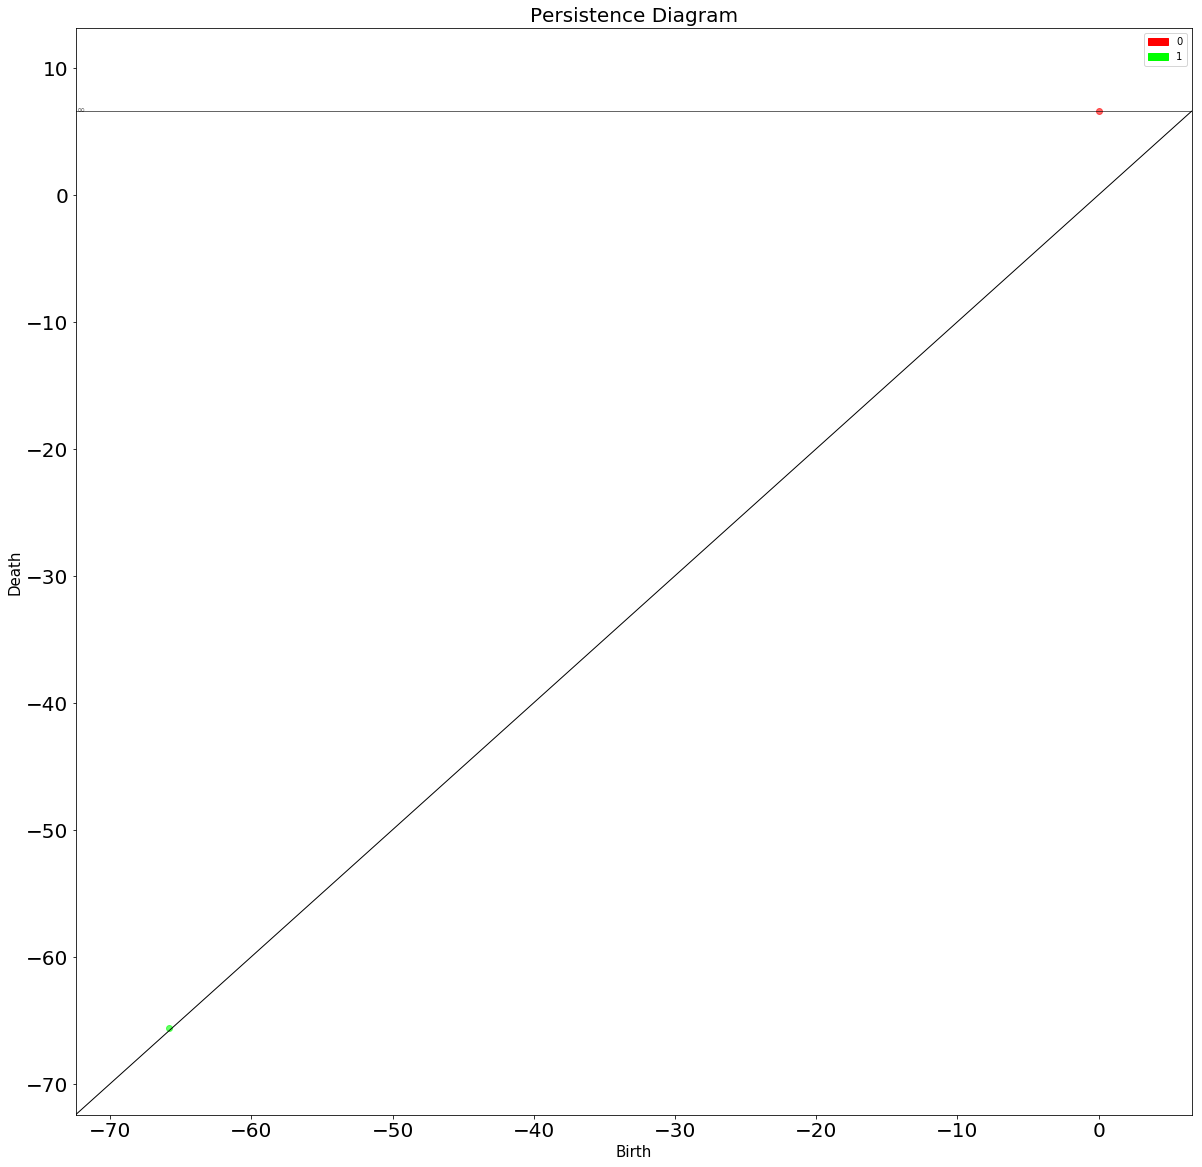

In [123]:
#distance_matrix_new = np.ones((cordata.shape),float) - cordata
rips_complex_new = gudhi.RipsComplex(distance_matrix=dis_matrix_cor, max_edge_length=6.0)
simplex_tree_new = rips_complex_new.create_simplex_tree(max_dimension=2)
result_str_new = 'Rips complex is of dimension ' + repr(simplex_tree_new.dimension()) + ' - ' + \
    repr(simplex_tree_new.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree_new.num_vertices()) + ' vertices.'
print(result_str_new)
diag_Rips_new = simplex_tree_new.persistence()
fmt = '%s -> %.2f'
plt.figure(figsize=(20,20))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Birth', fontsize=15)
plt.ylabel('Death', fontsize=15)

gd.plot_persistence_diagram(diag_Rips_new,legend=True)
plt.title("Persistence Diagram",fontsize =20)

Text(0, 0.5, 'Death')

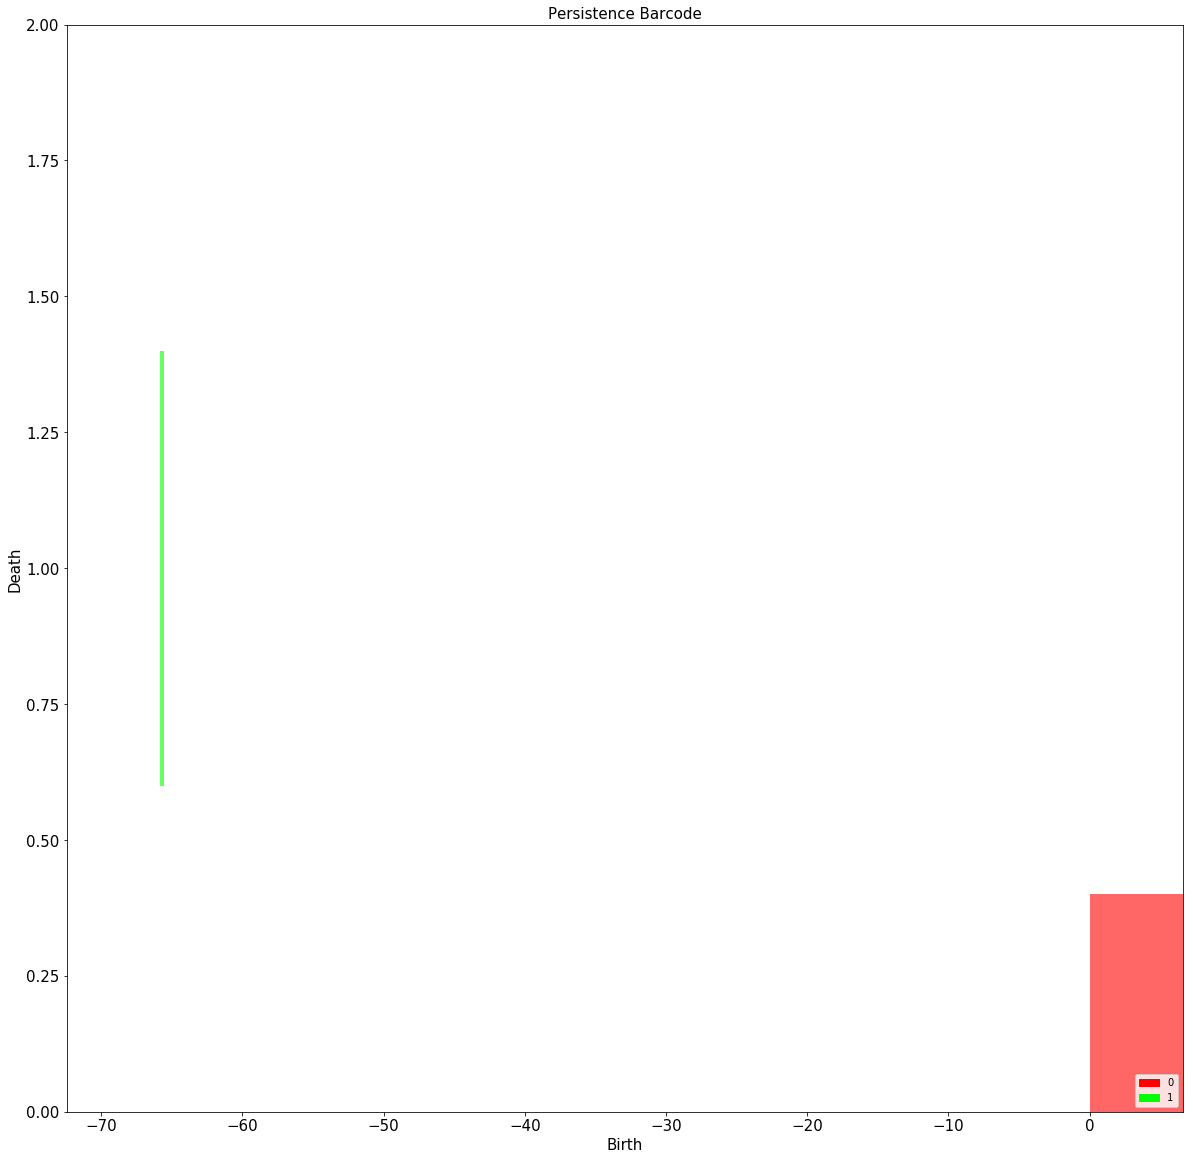

In [124]:
plt.figure(figsize=(20,20))
gd.plot_persistence_barcode(diag_Rips_new,legend=True)
plt.title("Persistence Barcode",fontsize =15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Birth', fontsize=15)
plt.ylabel('Death', fontsize=15)

## Building up Rips complexes by using distance matrix on correlation matrix

Rips complex is of dimension 2 - 5410559 simplices - 319 vertices.


Text(0.5, 1.0, 'Persistence Diagram')

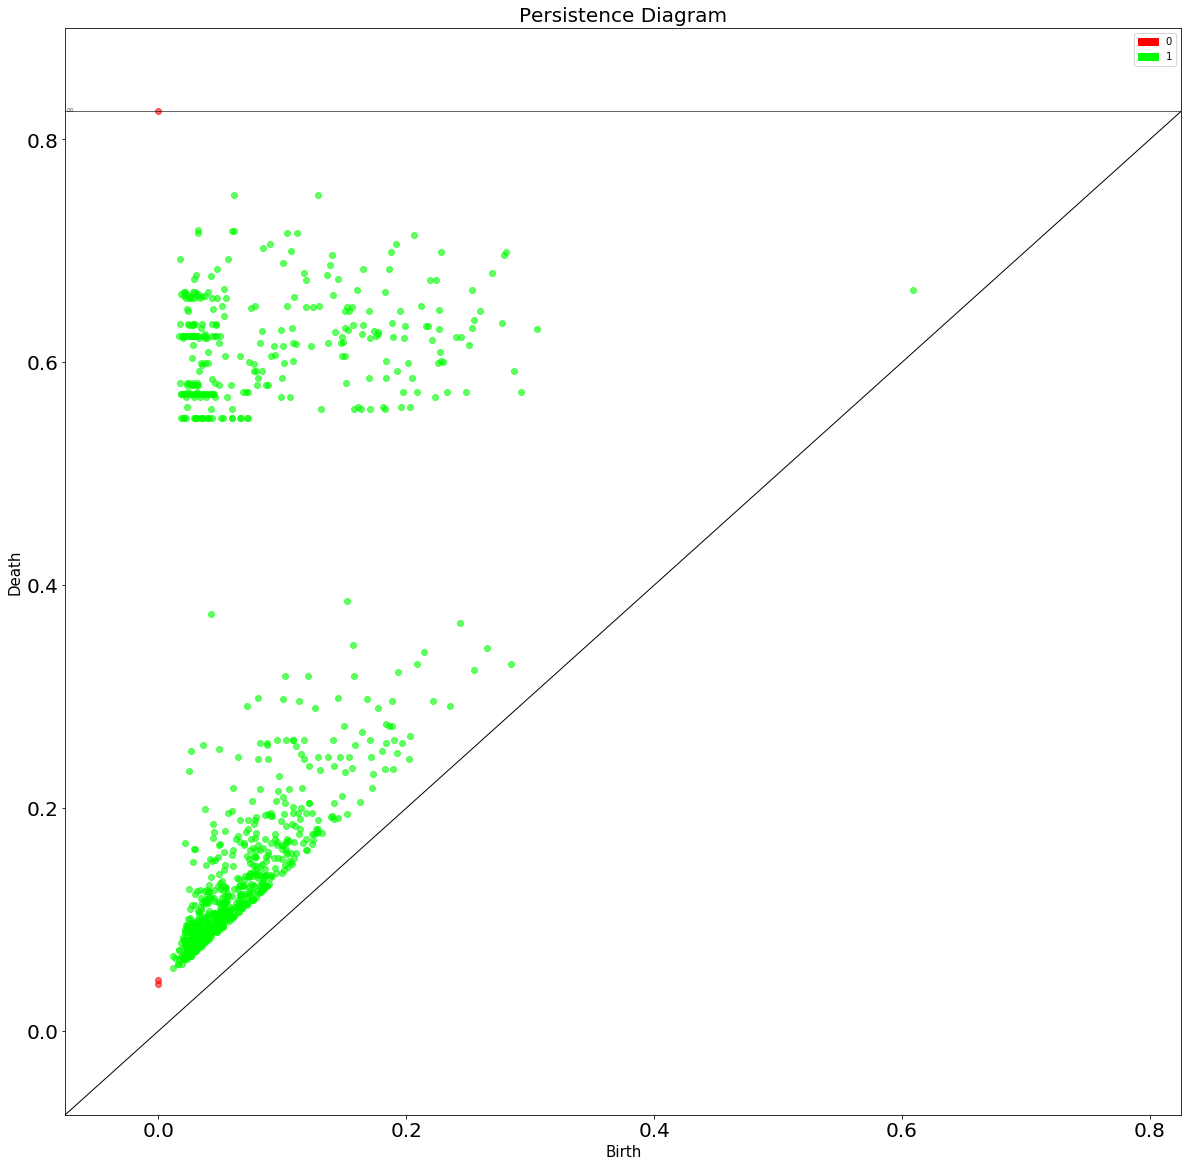

In [125]:
distance_matrix_fi = np.ones((cordata.shape),float) - cordata
rips_complex_fi = gudhi.RipsComplex(distance_matrix=distance_matrix_fi, max_edge_length=6.0)
simplex_tree_fi = rips_complex_fi.create_simplex_tree(max_dimension=2)
result_str_fi = 'Rips complex is of dimension ' + repr(simplex_tree_fi.dimension()) + ' - ' + \
    repr(simplex_tree_fi.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree_fi.num_vertices()) + ' vertices.'
print(result_str_fi)
diag_Rips_fi = simplex_tree_fi.persistence()
fmt = '%s -> %.2f'
plt.figure(figsize=(20,20))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Birth', fontsize=15)
plt.ylabel('Death', fontsize=15)

gd.plot_persistence_diagram(diag_Rips_fi,legend=True)
plt.title("Persistence Diagram",fontsize =20)

In [126]:
#the persistence pairs of the simplicial complex
print(len(simplex_tree_fi.persistence_pairs()))
simplex_tree_fi.persistence_pairs()

3627


[([294], [294, 13]),
 ([13], [13, 0]),
 ([60], [60, 22]),
 ([300], [300, 168]),
 ([224], [224, 98]),
 ([154], [154, 4]),
 ([215], [215, 152]),
 ([275], [275, 98]),
 ([273], [273, 126]),
 ([166], [166, 98]),
 ([242], [242, 170]),
 ([131], [131, 20]),
 ([262], [262, 44]),
 ([44], [262, 88]),
 ([247], [247, 22]),
 ([118], [118, 105]),
 ([272], [272, 78]),
 ([88], [262, 128]),
 ([12], [12, 11]),
 ([128], [262, 183]),
 ([72], [72, 31]),
 ([69], [69, 0]),
 ([176], [176, 170]),
 ([264], [264, 191]),
 ([130], [130, 129]),
 ([212], [212, 107]),
 ([299], [299, 103]),
 ([185], [185, 57]),
 ([217], [217, 201]),
 ([81], [81, 39]),
 ([277], [277, 124]),
 ([56], [56, 19]),
 ([183], [183, 11]),
 ([265], [265, 33]),
 ([11], [183, 111]),
 ([233], [233, 223]),
 ([289], [289, 8]),
 ([61], [61, 22]),
 ([213], [213, 54]),
 ([276], [276, 189]),
 ([152], [215, 141]),
 ([109], [109, 0]),
 ([92], [92, 4]),
 ([198], [198, 152]),
 ([37], [37, 5]),
 ([57], [57, 0]),
 ([286], [286, 42]),
 ([9], [9, 0]),
 ([170], [1

In [127]:
simplex_tree_fi.persistence_intervals_in_dimension(0)

[(0.0, 0.0027173175267537486),
 (0.0, 0.00380687335354013),
 (0.0, 0.004128192099621897),
 (0.0, 0.004405649406211687),
 (0.0, 0.00482310199472058),
 (0.0, 0.004836484160428034),
 (0.0, 0.004912252675106754),
 (0.0, 0.005069199356732779),
 (0.0, 0.005208209973760258),
 (0.0, 0.005620644289343724),
 (0.0, 0.005727678432409733),
 (0.0, 0.006228544003897829),
 (0.0, 0.006249076754311855),
 (0.0, 0.006317745461475344),
 (0.0, 0.006961740004820971),
 (0.0, 0.007258503184548015),
 (0.0, 0.007280799979506591),
 (0.0, 0.0072956067375768985),
 (0.0, 0.007341711873068313),
 (0.0, 0.0073720799689090954),
 (0.0, 0.007411428628500305),
 (0.0, 0.007425096956413579),
 (0.0, 0.007551078279818713),
 (0.0, 0.007584064595639983),
 (0.0, 0.007697676864302783),
 (0.0, 0.0078010484677197844),
 (0.0, 0.008037819244727573),
 (0.0, 0.008085012284768878),
 (0.0, 0.00836460609983769),
 (0.0, 0.008437696938440875),
 (0.0, 0.008653575850116058),
 (0.0, 0.008786129352488015),
 (0.0, 0.009110617678922628),
 (0.0, 0.

In [128]:
print(rips_complex_fi)

Text(0.5, 1.0, 'Persistence Barcode')

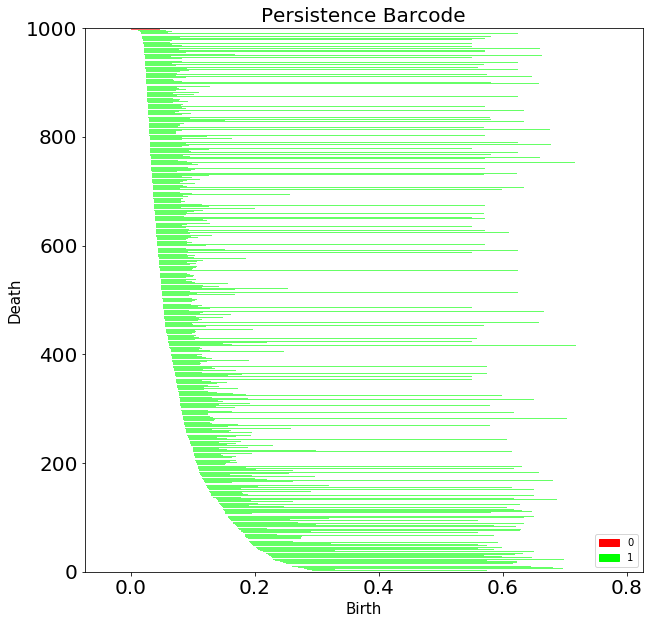

In [129]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Birth', fontsize=15)
plt.ylabel('Death', fontsize=15)
gd.plot_persistence_barcode(diag_Rips_fi,legend=True)
plt.title("Persistence Barcode",fontsize =20)

## Building up Rips complexes by using point cloud on correlation matrix

In [237]:
rips_complex = gudhi.RipsComplex(points=cordata,
    max_edge_length=6.0)

simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)
fmt = '%s -> %.2f'
'''
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))
'''

Rips complex is of dimension 2 - 1353836 simplices - 319 vertices.


'\nfor filtered_value in simplex_tree.get_filtration():\n    print(fmt % tuple(filtered_value))\n'

In [239]:
#[[field] dimension] birth death
diag_Rips = simplex_tree.persistence()
diag_Rips

[(1, (0.7738249629022241, 1.110068999542732)),
 (1, (0.7994616712202999, 1.110464513134067)),
 (1, (0.9179662680080544, 1.2142633926680733)),
 (1, (0.779481813751799, 1.073579768164224)),
 (1, (0.7934475771105239, 1.0863197105179245)),
 (1, (0.7902908178114705, 1.0748337535098833)),
 (1, (0.7277233796675077, 1.0008378896453014)),
 (1, (0.985038424695642, 1.2500740582204928)),
 (1, (0.9521104704835328, 1.216198167452951)),
 (1, (0.8789640043077928, 1.1256616322859299)),
 (1, (1.1003148159358163, 1.3442511617837596)),
 (1, (0.7454857214886088, 0.9794294671529648)),
 (1, (0.8158069819165031, 1.0483086842396299)),
 (1, (0.8442017285347059, 1.0753500049775508)),
 (1, (0.8266830153519992, 1.0520832659198283)),
 (1, (0.8367773365091469, 1.061055274192619)),
 (1, (0.8191893124294124, 1.039420423356568)),
 (1, (0.8793701485894789, 1.0995252030927725)),
 (1, (0.9694736061202042, 1.1875879655692416)),
 (1, (0.9782260135967579, 1.1941735281258252)),
 (1, (0.8814185928880367, 1.0956987634105946)),


In [240]:
print(len(simplex_tree.persistence_pairs()))
simplex_tree.persistence_pairs()

542


[([275], [275, 224]),
 ([190], [190, 61]),
 ([224], [224, 166]),
 ([271], [271, 227]),
 ([267], [267, 244]),
 ([148], [148, 39]),
 ([240], [240, 155]),
 ([117], [117, 48]),
 ([133], [133, 87]),
 ([297], [297, 226]),
 ([74], [74, 30]),
 ([36], [36, 18]),
 ([48], [117, 26]),
 ([50], [50, 8]),
 ([61], [190, 171]),
 ([316], [316, 244]),
 ([151], [151, 111]),
 ([73], [73, 44]),
 ([215], [215, 198]),
 ([14], [14, 5]),
 ([90], [90, 38]),
 ([310], [310, 171]),
 ([170], [170, 47]),
 ([69], [69, 6]),
 ([8], [50, 28]),
 ([141], [141, 11]),
 ([249], [249, 167]),
 ([171], [310, 3]),
 ([212], [212, 94]),
 ([256], [256, 52]),
 ([244], [267, 171]),
 ([207], [207, 184]),
 ([290], [290, 268]),
 ([109], [109, 72]),
 ([294], [294, 0]),
 ([5], [5, 4]),
 ([247], [247, 82]),
 ([264], [264, 16]),
 ([26], [48, 15]),
 ([28], [50, 40]),
 ([3], [244, 14]),
 ([184], [184, 173]),
 ([266], [266, 258]),
 ([155], [240, 168]),
 ([313], [313, 138]),
 ([259], [259, 173]),
 ([307], [307, 161]),
 ([214], [214, 200]),
 ([4]

compute the persistence on the simplex tree structure by using persistence() method

access to persistence_intervals per dimension using the persistence_intervals_in_dimension() method

In [132]:
simplex_tree.persistence_intervals_in_dimension(0)

[(0.0, 0.07134703072080016),
 (0.0, 0.13007125367223404),
 (0.0, 0.14715936960735782),
 (0.0, 0.17006491585557088),
 (0.0, 0.18436021202568942),
 (0.0, 0.18559541426915377),
 (0.0, 0.18921225371697378),
 (0.0, 0.23587649342416275),
 (0.0, 0.23620389453077745),
 (0.0, 0.2569481248385064),
 (0.0, 0.27848005927667707),
 (0.0, 0.2938749271664647),
 (0.0, 0.3084374161719727),
 (0.0, 0.33254842537196816),
 (0.0, 0.33423724493570806),
 (0.0, 0.33536248834643306),
 (0.0, 0.3531810982127387),
 (0.0, 0.35392838219468636),
 (0.0, 0.3592515086793473),
 (0.0, 0.3599624297752496),
 (0.0, 0.36158379370350385),
 (0.0, 0.36289432097674945),
 (0.0, 0.3644622676652497),
 (0.0, 0.36531418559829226),
 (0.0, 0.3685168511821004),
 (0.0, 0.37118677924457183),
 (0.0, 0.37526877168016304),
 (0.0, 0.3760890416931186),
 (0.0, 0.38000053048833027),
 (0.0, 0.3858514683766496),
 (0.0, 0.38722693114524903),
 (0.0, 0.3894016034231213),
 (0.0, 0.3958681835865876),
 (0.0, 0.3978469571380461),
 (0.0, 0.3983138211259397),

In [168]:
simplex_tree.persistence_intervals_in_dimension(1)

[(0.43937108368161454, 0.4395389982085729),
 (0.47044045905296494, 0.4743065277937286),
 (0.5599756035893254, 0.5938819601191226),
 (0.5393240771310718, 0.6046022705682186),
 (0.5498627935203645, 0.6450466338976297),
 (0.6672013959160329, 0.6677800756403184),
 (0.667885483405374, 0.6914526485722982),
 (0.6298202045712384, 0.7088259115618989),
 (0.6772122251322769, 0.7111275830376682),
 (0.6348340955186006, 0.71128231086571),
 (0.6095371612191433, 0.7211045082615082),
 (0.6633491331669148, 0.7260327890318735),
 (0.7223434524893603, 0.7268055037982629),
 (0.6523251676645726, 0.729274494016164),
 (0.710651979580157, 0.7312497131419202),
 (0.7080537943415601, 0.7363215700678526),
 (0.7232358173497462, 0.7427222596085661),
 (0.6783469387122923, 0.7438695076131705),
 (0.6997735041308215, 0.7441025153611248),
 (0.7364984448139958, 0.7532926074231794),
 (0.7372467862191725, 0.7546275997768411),
 (0.6947560704126062, 0.761213716992009),
 (0.6945115959321321, 0.7616876813255593),
 (0.76011499078

Text(0.5, 1.0, 'Persistence Diagram')

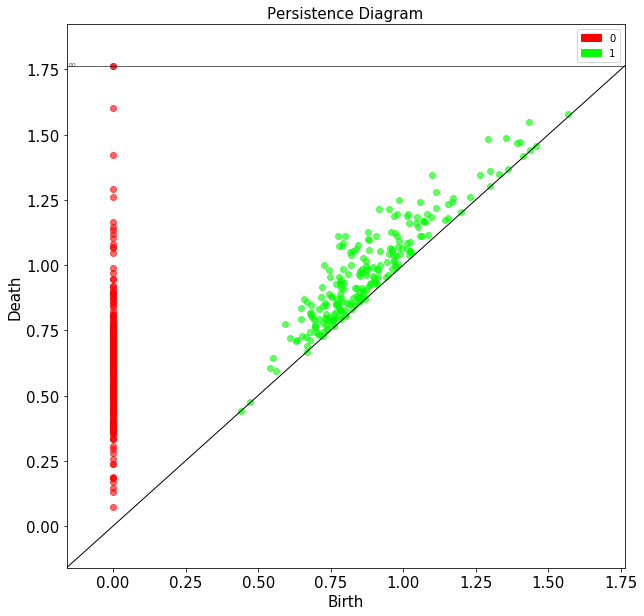

In [134]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
gd.plot_persistence_diagram(diag_Rips,legend=True)
plt.xlabel('Birth', fontsize=15)
plt.ylabel('Death', fontsize=15)
plt.title("Persistence Diagram",fontsize = 15)

We can also plot the landscape with the landscapes_approx() function

Text(0, 0.5, 'Death')

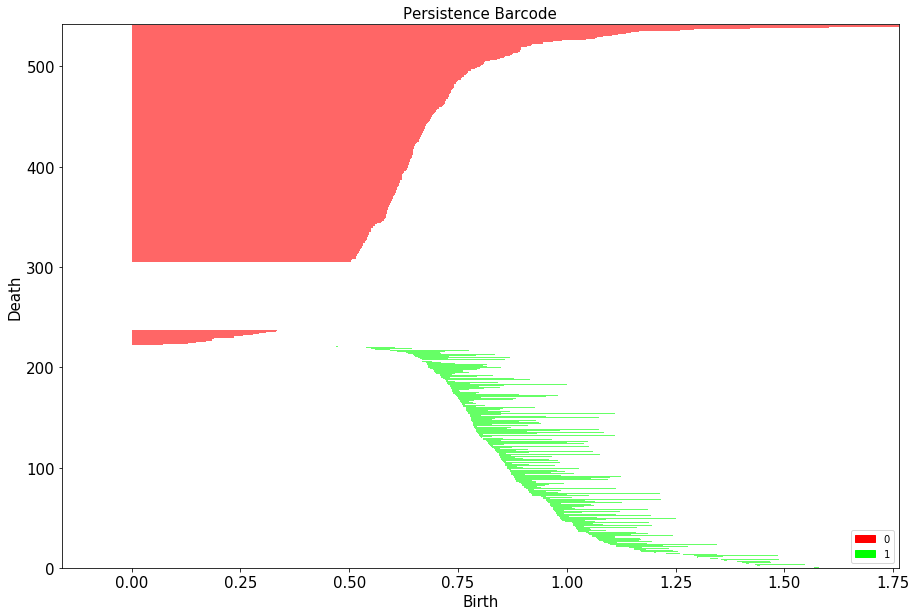

In [256]:
plt.figure(figsize=(15,10))


gd.plot_persistence_barcode(diag_Rips,legend=True)
plt.title("Persistence Barcode",fontsize =15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Birth', fontsize=15)
plt.ylabel('Death', fontsize=15)

## TDA on MxMT

In [136]:
combined_matrix=np.array(combined_matrix)
combined_matrix

array([[56,  0,  0, ...,  0,  0,  0],
       [ 0, 35, 21, ..., 14, 11, 26],
       [ 0, 21, 31, ..., 15,  7, 13],
       ...,
       [ 0, 14, 15, ..., 42,  5,  8],
       [ 0, 11,  7, ...,  5, 21, 13],
       [ 0, 26, 13, ...,  8, 13, 34]])

In [137]:
len(combined_matrix)

319

In [145]:
combined_matrix

array([[56,  0,  0, ...,  0,  0,  0],
       [ 0, 35, 21, ..., 14, 11, 26],
       [ 0, 21, 31, ..., 15,  7, 13],
       ...,
       [ 0, 14, 15, ..., 42,  5,  8],
       [ 0, 11,  7, ...,  5, 21, 13],
       [ 0, 26, 13, ...,  8, 13, 34]])

## Building up Rips complexes by using distance matrix on $MxM^T$

In [138]:
distance_matrix = np.ones((combined_matrix.shape),float) - combined_matrix
rips_complex_X = gudhi.RipsComplex(distance_matrix=distance_matrix, max_edge_length=6.0)

Rips complex is of dimension 2 - 1353836 simplices - 319 vertices.


Text(0.5, 1.0, 'Persistence Diagram')

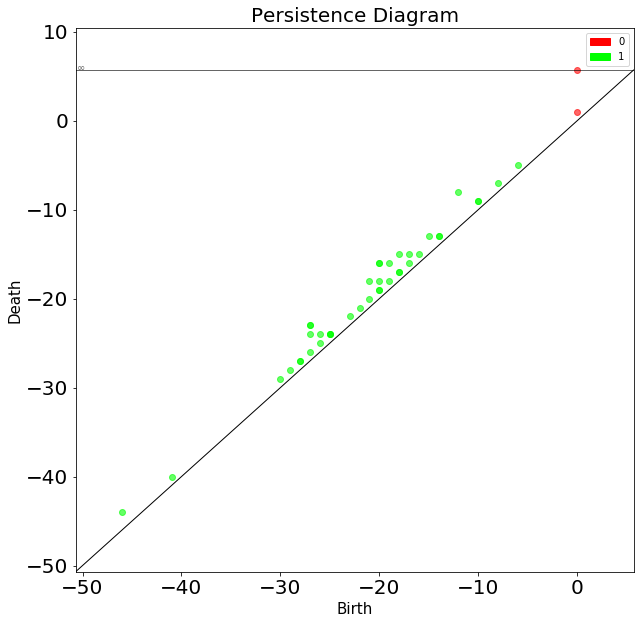

In [139]:
simplex_tree_X = rips_complex_X.create_simplex_tree(max_dimension=2)
result_str_X = 'Rips complex is of dimension ' + repr(simplex_tree_X.dimension()) + ' - ' + \
    repr(simplex_tree_X.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree_X.num_vertices()) + ' vertices.'
print(result_str)
diag_Rips_X = simplex_tree_X.persistence()
fmt = '%s -> %.2f'
plt.figure(figsize=(10,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Birth', fontsize=15)
plt.ylabel('Death', fontsize=15)

gd.plot_persistence_diagram(diag_Rips_X,legend=True)
plt.title("Persistence Diagram",fontsize =20)

Text(0.5, 1.0, 'Persistence Barcode')

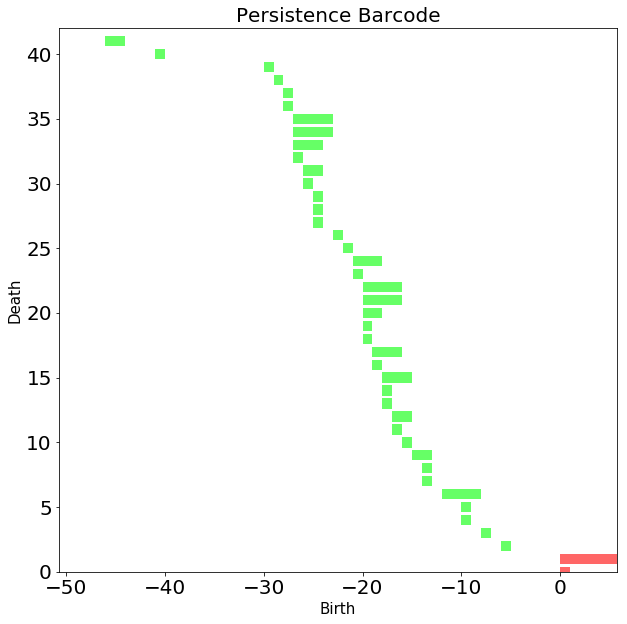

In [140]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Birth', fontsize=15)
plt.ylabel('Death', fontsize=15)

gd.plot_persistence_barcode(diag_Rips_X)
plt.title("Persistence Barcode",fontsize =20)

## Building up Rips complexes by using point cloud on $MxM^T$

Rips complex is of dimension 1 - 320 simplices - 319 vertices.


Text(0.5, 1.0, 'Persistence Diagram')

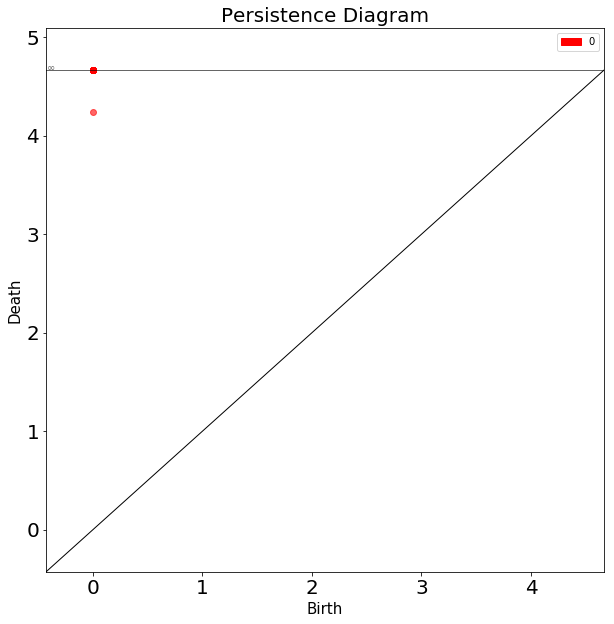

In [141]:
rips_complex_M = gudhi.RipsComplex(points=combined_matrix,
    max_edge_length=6.0)

simplex_tree_M = rips_complex_M.create_simplex_tree(max_dimension=2)
result_str_M = 'Rips complex is of dimension ' + repr(simplex_tree_M.dimension()) + ' - ' + \
    repr(simplex_tree_M.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree_M.num_vertices()) + ' vertices.'
print(result_str_M)
diag_Rips_M = simplex_tree_M.persistence()
fmt = '%s -> %.2f'
plt.figure(figsize=(10,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Birth', fontsize=15)
plt.ylabel('Death', fontsize=15)

gd.plot_persistence_diagram(diag_Rips_M,legend=True)
plt.title("Persistence Diagram",fontsize =20)


In [142]:
simplex_tree_M.persistence_intervals_in_dimension(1)

[]

Text(0.5, 1.0, 'Persistence Barcode')

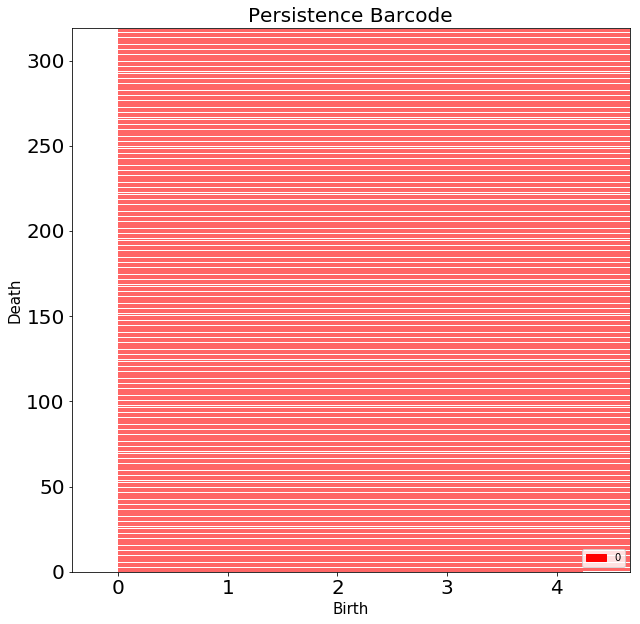

In [143]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Birth', fontsize=15)
plt.ylabel('Death', fontsize=15)

gd.plot_persistence_barcode(diag_Rips_M,legend=True)
plt.title("Persistence Barcode",fontsize =20)

In [167]:
# Import the class
import kmapper as km
from kmapper import jupyter # Creates custom CSS full-size Jupyter screen
# Some sample data
#from sklearn import datasets
#data, labels = datasets.make_circles(n_samples=5000, noise=0.03, factor=0.3)
from IPython.display import IFrame
# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(combined_matrix, projection=[0,1]) # X-Y axis

# Create dictionary called 'graph' with nodes, edges and meta-information

graph = mapper.map(projected_data,
                   clusterer=cluster.AgglomerativeClustering(n_clusters=2,
                                                             linkage="complete",
                                                             affinity="euclidean"),
                   overlap_perc=0.33)
#graph = mapper.map(projected_data,cordata,cover=km.Cover(n_cubes=2))

# Visualize it
mapper.visualize(graph, path_html="make_circles_keplermapper_output.html",
                 title="make_circles(n_samples=500, noise=0.03, factor=0.3)")


IFrame(src='make_circles_keplermapper_output.html', width=1000, height=1000)
#display.IFrame(path_html="")

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (319, 319)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))



H:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Mapping on data shaped (319, 2) using lens shaped (319, 2)

Creating 100 hypercubes.

Created 13 edges and 30 nodes in 0:00:00.035980.
Wrote visualization to: make_circles_keplermapper_output.html
